In [169]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [170]:
# Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Preparation
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
#
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

# Model Performance
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Model Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [171]:
from warnings import filterwarnings         # This is mainly used to avoid the unnecessary warnings which come while running the code due to the changes in the python liabrary 
filterwarnings("ignore")

In [172]:
import os 
os.getcwd()
# by help of this command, we can find the current directory of your system which it makes it easy for us, so that we can save the file accordingly which we want to read.

'/Users/ualguest/Desktop/Project'

In [173]:
df=pd.read_excel("Customer_Churn_Data.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [7]:
pd.options.display.max_columns = None

In [8]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [10]:
df = df.drop(["AccountID"], axis=1)
df.head(2)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [12]:
print("the no of rows ",df.shape[0]," ", "the no of colums ",df.shape[1])

the no of rows  11260   the no of colums  18


In [13]:
df.shape

(11260, 18)

In [14]:
df.cashback.unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [15]:
df.dtypes

Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [16]:
for feature in df.columns:
    if df[feature].dtype=='object':
        print(feature.upper() ," ",df[feature].nunique())
        print(df[feature].value_counts().sort_values())
            

TENURE   38
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64
PAYMENT   5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64
GENDER   4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64
ACCOUNT_USER_COUNT   7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64
ACCOUNT_SEGMENT   7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Plus    3862
Su

In [17]:
df.dtypes

Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [18]:
# skewness values quantitatively:
df.skew().sort_values(ascending=False)

Churn              1.772606
CC_Contacted_LY    1.422977
Complain_ly        0.950876
City_Tier          0.737107
Service_Score      0.003891
CC_Agent_Score    -0.142149
dtype: float64

<AxesSubplot:>

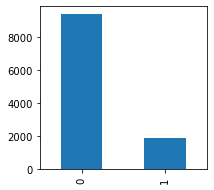

In [19]:
df['Churn'].value_counts().plot(kind='bar',figsize=(3,3))

# EDA

### Treating the Special Characters (Also Converting them to correct data form):

#### Tenure:

In [20]:
df.describe(include="all")["Tenure"]

count     11158.0
unique       38.0
top           1.0
freq       1351.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN
Name: Tenure, dtype: float64

In [21]:
df.Tenure.unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [22]:
import re

# put the special characters in a list
special_char = ['"', '*', '/', '(', ')', ':', '\n', '#','No_info','@','$','+', '&']

special_char_escaped = list(map(re.escape, special_char))

In [23]:
df["Tenure"] = df["Tenure"].replace(special_char_escaped, 'nan', regex=True)

In [24]:
df.Tenure.unique()

array([4, 0, 2, 13, 11, 'nan', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [25]:
df["Tenure"] = df["Tenure"].astype("float")                                    # Cast the column into type float
df.describe()["Tenure"]

count    11042.000000
mean        11.025086
std         12.879782
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         99.000000
Name: Tenure, dtype: float64

In [26]:
df["Account_user_count"] = df["Account_user_count"].replace(special_char_escaped, 'nan', regex=True)
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].replace(special_char_escaped, 'nan', regex=True)
df["Day_Since_CC_connect"] = df["Day_Since_CC_connect"].replace(special_char_escaped, 'nan', regex=True)
df["rev_growth_yoy"] = df["rev_growth_yoy"].replace(special_char_escaped, 'nan', regex=True)
df["rev_per_month"] = df["rev_per_month"].replace(special_char_escaped, 'nan', regex=True)
df["Login_device"] = df["Login_device"].replace(special_char_escaped, 'nan', regex=True)

In [27]:
df["Account_user_count"] = df["Account_user_count"].astype("float") 
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].astype("float") 
df["Day_Since_CC_connect"] = df["Day_Since_CC_connect"].astype("float") 
df["rev_growth_yoy"] = df["rev_growth_yoy"].astype("float") 
df["rev_per_month"] = df["rev_per_month"].astype("float")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

#### Account_user_count:

In [29]:
df.describe(include="all")["Account_user_count"]

count     10816.000000
unique             NaN
top                NaN
freq               NaN
mean          3.692862
std           1.022976
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           6.000000
Name: Account_user_count, dtype: float64

In [30]:
df.Account_user_count.unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

#### coupon_used_for_payment:

In [31]:
df.describe(include="all")["coupon_used_for_payment"]

count     11257.000000
unique             NaN
top                NaN
freq               NaN
mean          1.790619
std           1.969551
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          16.000000
Name: coupon_used_for_payment, dtype: float64

In [32]:
df.coupon_used_for_payment.unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

#### Day_Since_CC_connect:

In [33]:
df.describe(include="all")["Day_Since_CC_connect"]

count     10902.000000
unique             NaN
top                NaN
freq               NaN
mean          4.633187
std           3.697637
min           0.000000
25%           2.000000
50%           3.000000
75%           8.000000
max          47.000000
Name: Day_Since_CC_connect, dtype: float64

In [34]:
df.Day_Since_CC_connect.unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

#### rev_growth_yoy:

In [35]:
df.describe(include="all")["rev_growth_yoy"]

count     11257.000000
unique             NaN
top                NaN
freq               NaN
mean         16.193391
std           3.757721
min           4.000000
25%          13.000000
50%          15.000000
75%          19.000000
max          28.000000
Name: rev_growth_yoy, dtype: float64

In [36]:
df.rev_growth_yoy.unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [37]:
df["rev_per_month"] = df["rev_per_month"].replace(special_char_escaped, 'nan', regex=True)

In [38]:
df["rev_per_month"] = df["rev_per_month"].astype("float") 

In [39]:
df.Login_device.unique()

array(['Mobile', 'Computer', nan], dtype=object)

### Checking for missing values:

In [40]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   471
Login_device               221
dtype: int64

In [41]:
df["cashback"] = df["cashback"].replace(special_char_escaped, 'nan', regex=True)

In [42]:
df["cashback"] = df["cashback"].astype("float")

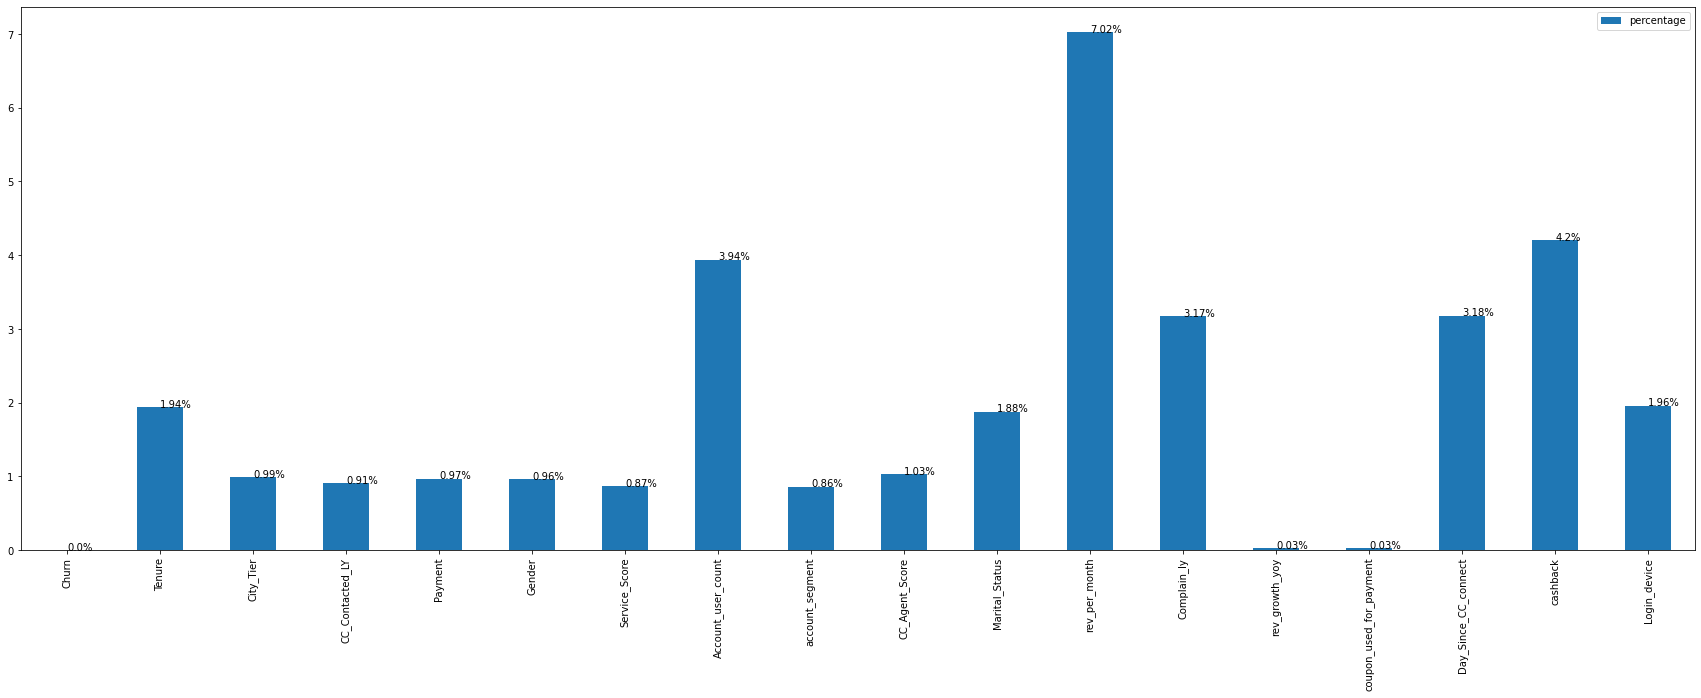

In [43]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

### Treating the Missing Values:

In [44]:
mode1=df["Payment"].mode().values[0]
mode2=df["Gender"].mode().values[0]
mode3=df["account_segment"].mode().values[0]
mode4=df["Marital_Status"].mode().values[0]
mode5=df["Login_device"].mode().values[0]

df["Payment"]=df["Payment"].replace(np.nan,mode1)
df["Gender"]=df["Gender"].replace(np.nan,mode2)
df["account_segment"]=df["account_segment"].replace(np.nan,mode3)
df["Marital_Status"]=df["Marital_Status"].replace(np.nan,mode4)
df["Login_device"]=df["Login_device"].replace(np.nan,mode5)

In [45]:
median1=df["Tenure"].median()
median2=df["Account_user_count"].median()
median3=df["rev_per_month"].median()
median4=df["rev_growth_yoy"].median()
median5=df["coupon_used_for_payment"].median()
median6=df["Day_Since_CC_connect"].median()
median7=df["CC_Contacted_LY"].median()
median8=df["Service_Score"].median()
median9=df["CC_Agent_Score"].median()
median10=df["Complain_ly"].median()
median11=df["City_Tier"].median()
median12=df["cashback"].median()

df["Tenure"].replace(np.nan,median1,inplace=True)
df["Account_user_count"].replace(np.nan,median2,inplace=True)
df["rev_per_month"].replace(np.nan,median3,inplace=True)
df["rev_growth_yoy"].replace(np.nan,median4,inplace=True)
df["coupon_used_for_payment"].replace(np.nan,median5,inplace=True)
df["Day_Since_CC_connect"].replace(np.nan,median6,inplace=True)
df["CC_Contacted_LY"].replace(np.nan,median7,inplace=True)
df["Service_Score"].replace(np.nan,median8,inplace=True)
df["CC_Agent_Score"].replace(np.nan,median9,inplace=True)
df["Complain_ly"].replace(np.nan,median10,inplace=True)
df["City_Tier"].replace(np.nan,median11,inplace=True)
df["cashback"].replace(np.nan,median12,inplace=True)

### Verifying the Missing Values treatment:

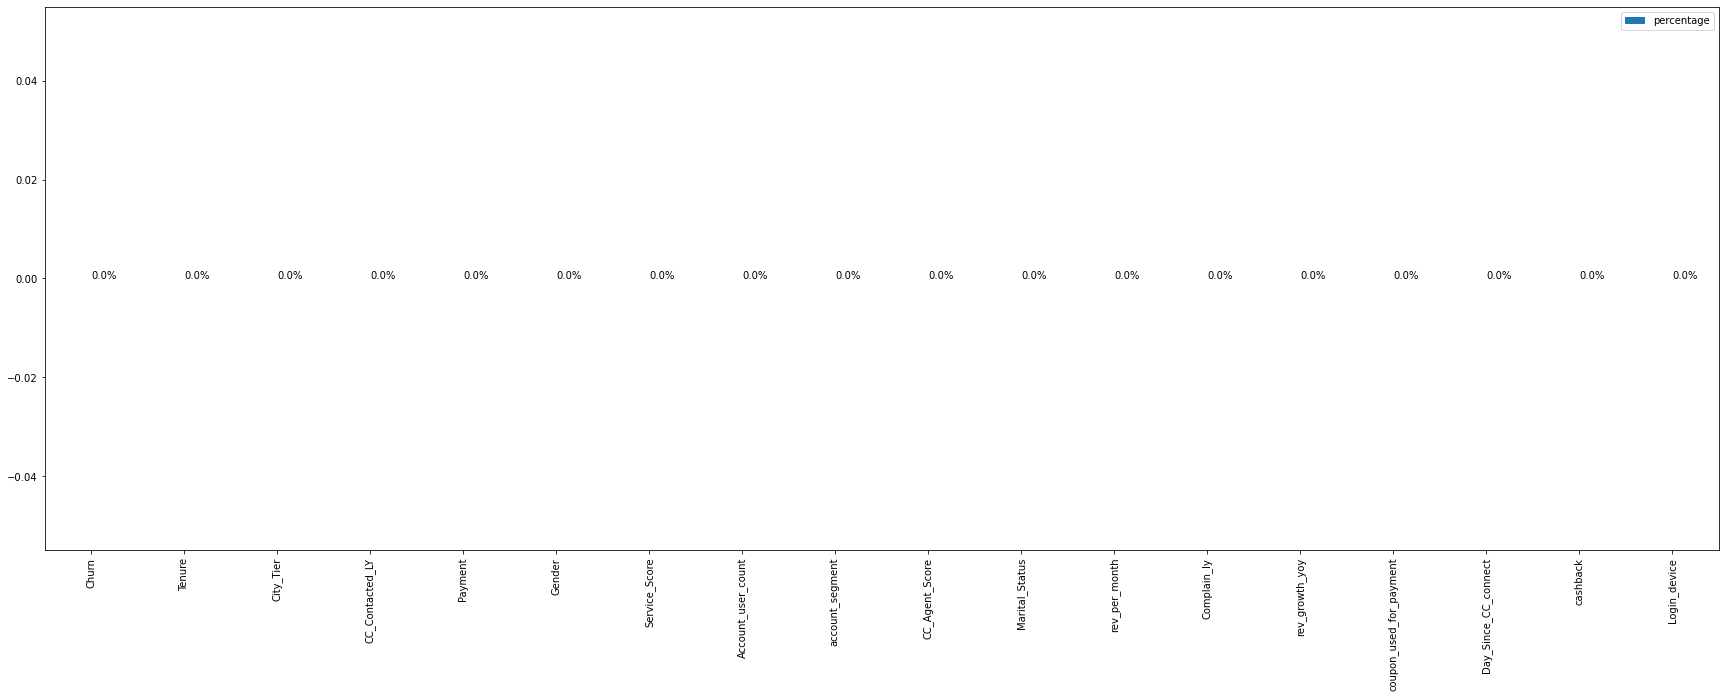

In [46]:
missing_count_df = df.isnull().sum() # the count of missing value
value_count_df = df.isnull().count() # the count of all values
missing_percentage_df = round(missing_count_df/value_count_df*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'count' : missing_count_df, 'percentage' : missing_percentage_df }) # create a dataframe
barchart = missing_df.plot.bar(y='percentage',rot=90,figsize=(30,10))
for index, percentage in enumerate(missing_percentage_df):
    barchart.text(index,percentage,str(percentage) + '%')

### Checking for duplicate records in the data:

In [47]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 297


,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
1347,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.90,Mobile
1366,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.07,Mobile
1395,1,11.0,1.0,6.0,Debit Card,Male,3.0,4.0,HNI,3.0,Single,10.0,1.0,13.0,0.0,0.0,153.81,Mobile
1456,1,0.0,1.0,13.0,Debit Card,Male,3.0,5.0,Super,3.0,Single,2.0,1.0,24.0,1.0,6.0,160.74,Computer
1485,1,0.0,1.0,15.0,Credit Card,Female,2.0,3.0,Regular Plus,5.0,Single,8.0,0.0,22.0,1.0,4.0,142.00,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5584,0,9.0,1.0,16.0,Credit Card,Male,3.0,4.0,Super,3.0,Single,3.0,0.0,20.0,1.0,9.0,175.98,Mobile
5604,1,20.0,1.0,14.0,Cash on Delivery,Male,4.0,4.0,Regular Plus,3.0,Married,10.0,0.0,12.0,7.0,9.0,148.39,Mobile
5605,0,15.0,1.0,35.0,Debit Card,Female,3.0,5.0,Super Plus,4.0,Married,2.0,0.0,24.0,2.0,11.0,260.70,Mobile
5611,0,12.0,3.0,17.0,Debit Card,Female,4.0,4.0,Super,1.0,Married,3.0,0.0,12.0,1.0,10.0,178.43,Mobile


### Dropping the Duplicates:

In [48]:
df.drop_duplicates(inplace=True) 

### Verifying the removal of Duplicates:

In [49]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


### Univariate Analysis:

#### (a) City_Tier:

In [50]:
print('Range of values: ', df['City_Tier'].max()-df['City_Tier'].min())

Range of values:  2.0


In [51]:
# Central values:

print('Minimum Age: ', df['City_Tier'].min())
print('Maximum Age: ', df['City_Tier'].max())
print('Mean value: ', df['City_Tier'].mean())
print('Median value: ', df['City_Tier'].median())
print('Standard deviation: ', df['City_Tier'].std())
print('Null values: ', df['City_Tier'].isnull().any())

Minimum Age:  1.0
Maximum Age:  3.0
Mean value:  1.6479065949101523
Median value:  1.0
Standard deviation:  0.9135661579816643
Null values:  False


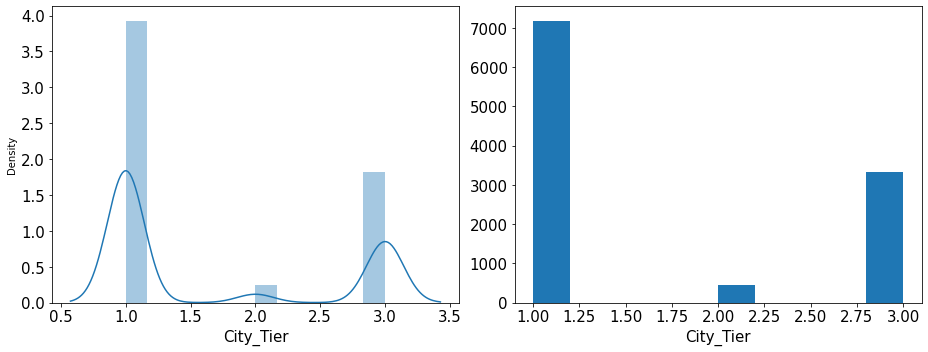

In [52]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['City_Tier'],ax=ax2)
ax2.set_xlabel('City_Tier', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['City_Tier'])
ax3.set_xlabel('City_Tier', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (b) CC_Contacted_LY:

In [53]:
print('Range of values: ', df['CC_Contacted_LY'].max()-df['CC_Contacted_LY'].min())

Range of values:  128.0


In [54]:
# Central values:

print('Minimum Age: ', df['CC_Contacted_LY'].min())
print('Maximum Age: ', df['CC_Contacted_LY'].max())
print('Mean value: ', df['CC_Contacted_LY'].mean())
print('Median value: ', df['CC_Contacted_LY'].median())
print('Standard deviation: ', df['CC_Contacted_LY'].std())
print('Null values: ', df['CC_Contacted_LY'].isnull().any())

Minimum Age:  4.0
Maximum Age:  132.0
Mean value:  17.876220012770226
Median value:  16.0
Standard deviation:  8.834275804341084
Null values:  False


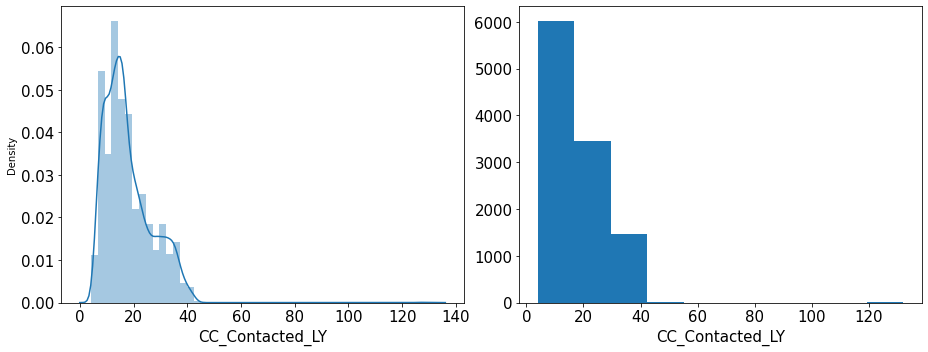

In [55]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['CC_Contacted_LY'],ax=ax2)
ax2.set_xlabel('CC_Contacted_LY', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['CC_Contacted_LY'])
ax3.set_xlabel('CC_Contacted_LY', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (c) Service_Score:

In [56]:
print('Range of values: ', df['Service_Score'].max()-df['Service_Score'].min())

Range of values:  5.0


In [57]:
# Central values:

print('Minimum Age: ', df['Service_Score'].min())
print('Maximum Age: ', df['Service_Score'].max())
print('Mean value: ', df['Service_Score'].mean())
print('Median value: ', df['Service_Score'].median())
print('Standard deviation: ', df['Service_Score'].std())
print('Null values: ', df['Service_Score'].isnull().any())

Minimum Age:  0.0
Maximum Age:  5.0
Mean value:  2.9015780352093405
Median value:  3.0
Standard deviation:  0.7231669981449135
Null values:  False


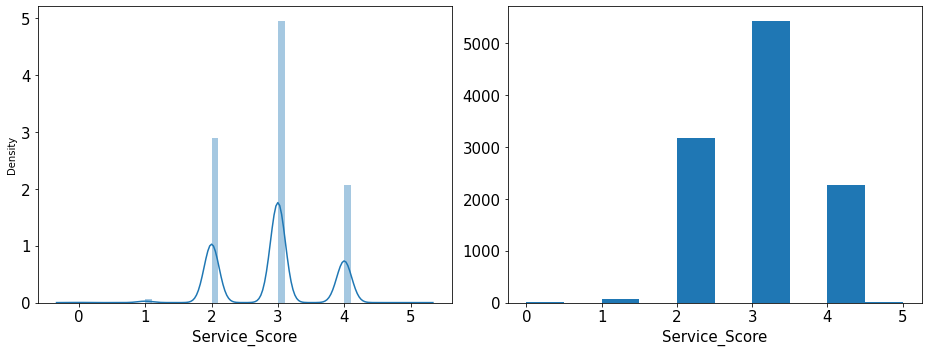

In [58]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Service_Score'],ax=ax2)
ax2.set_xlabel('Service_Score', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Service_Score'])
ax3.set_xlabel('Service_Score', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (d) CC_Agent_Score:

In [59]:
print('Range of values: ', df['CC_Agent_Score'].max()-df['CC_Agent_Score'].min())

Range of values:  4.0


In [60]:
# Central values:

print('Minimum Age: ', df['CC_Agent_Score'].min())
print('Maximum Age: ', df['CC_Agent_Score'].max())
print('Mean value: ', df['CC_Agent_Score'].mean())
print('Median value: ', df['CC_Agent_Score'].median())
print('Standard deviation: ', df['CC_Agent_Score'].std())
print('Null values: ', df['CC_Agent_Score'].isnull().any())

Minimum Age:  1.0
Maximum Age:  5.0
Mean value:  3.0551856243728905
Median value:  3.0
Standard deviation:  1.3729610846159075
Null values:  False


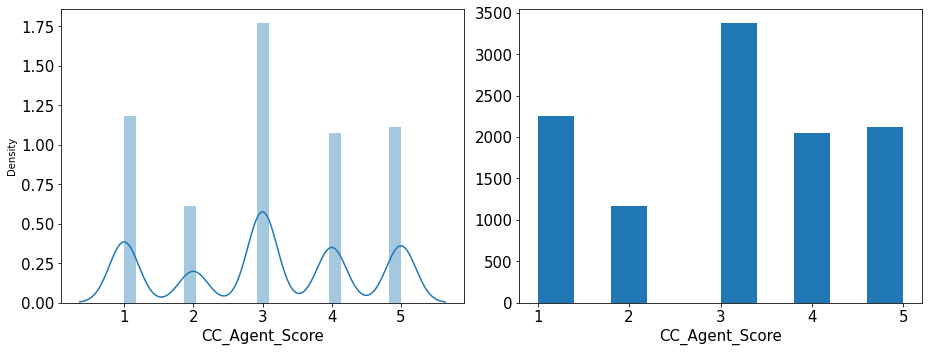

In [61]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['CC_Agent_Score'],ax=ax2)
ax2.set_xlabel('CC_Agent_Score', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['CC_Agent_Score'])
ax3.set_xlabel('CC_Agent_Score', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (e) Complain_ly:

In [62]:
print('Range of values: ', df['Complain_ly'].max()-df['Complain_ly'].min())

Range of values:  1.0


In [63]:
# Central values:

print('Minimum Age: ', df['Complain_ly'].min())
print('Maximum Age: ', df['Complain_ly'].max())
print('Mean value: ', df['Complain_ly'].mean())
print('Median value: ', df['Complain_ly'].median())
print('Standard deviation: ', df['Complain_ly'].std())
print('Null values: ', df['Complain_ly'].isnull().any())

Minimum Age:  0.0
Maximum Age:  1.0
Mean value:  0.27647541731277936
Median value:  0.0
Standard deviation:  0.4472750933528805
Null values:  False


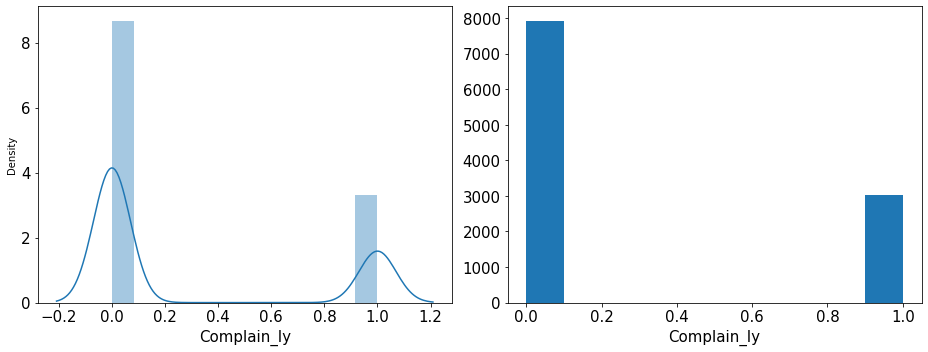

In [64]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Complain_ly'],ax=ax2)
ax2.set_xlabel('Complain_ly', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Complain_ly'])
ax3.set_xlabel('Complain_ly', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (f) Churn:

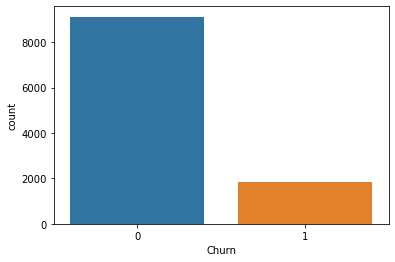

In [65]:
sns.countplot(data = df, x = 'Churn')                                                  ## count plot
plt.show()

#### (g) Tenure:

In [66]:
print('Range of values: ', df['Tenure'].max()-df['Tenure'].min())

Range of values:  99.0


In [67]:
# Central values:

print('Minimum Age: ', df['Tenure'].min())
print('Maximum Age: ', df['Tenure'].max())
print('Mean value: ', df['Tenure'].mean())
print('Median value: ', df['Tenure'].median())
print('Standard deviation: ', df['Tenure'].std())
print('Null values: ', df['Tenure'].isnull().any())


Minimum Age:  0.0
Maximum Age:  99.0
Mean value:  11.034388397336496
Median value:  9.0
Standard deviation:  12.861357865424232
Null values:  False


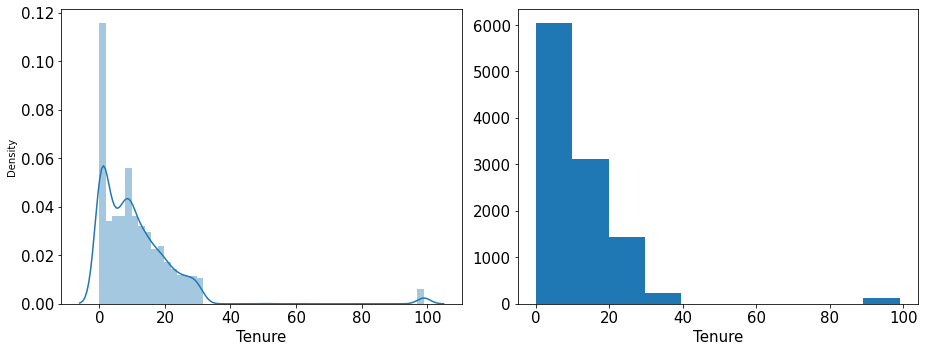

In [68]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Tenure'],ax=ax2)
ax2.set_xlabel('Tenure', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Tenure'])
ax3.set_xlabel('Tenure', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (h) Payment:

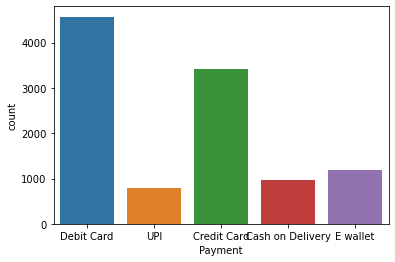

In [69]:
sns.countplot(data = df, x = 'Payment')                                                  ## count plot
plt.show()

#### (i) Gender:

In [70]:
df["Gender"] = df["Gender"].replace("M", 'Male').replace("F", 'Female')

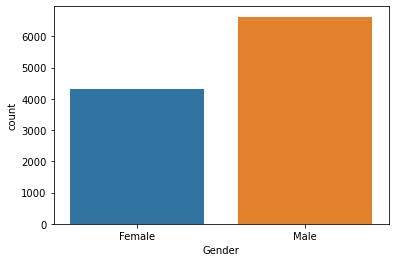

In [71]:
sns.countplot(data = df, x = 'Gender')                                                  ## count plot
plt.show()

#### (j) Account_user_count:

In [72]:
print('Range of values: ', df['Account_user_count'].max()-df['Account_user_count'].min())

Range of values:  5.0


In [73]:
# Central values:

print('Minimum Age: ', df['Account_user_count'].min())
print('Maximum Age: ', df['Account_user_count'].max())
print('Mean value: ', df['Account_user_count'].mean())
print('Median value: ', df['Account_user_count'].median())
print('Standard deviation: ', df['Account_user_count'].std())
print('Null values: ', df['Account_user_count'].isnull().any())

Minimum Age:  1.0
Maximum Age:  6.0
Mean value:  3.704825321536076
Median value:  4.0
Standard deviation:  1.0054047857025463
Null values:  False


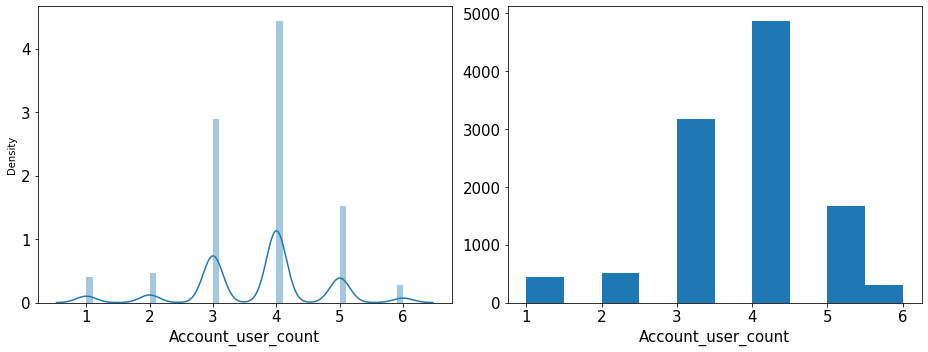

In [74]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Account_user_count'],ax=ax2)
ax2.set_xlabel('Account_user_count', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Account_user_count'])
ax3.set_xlabel('Account_user_count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (k) account_segment:

In [75]:
df["account_segment"] = df["account_segment"].replace("Regular +", 'Regular Plus').replace("Super +", 'Super Plus')

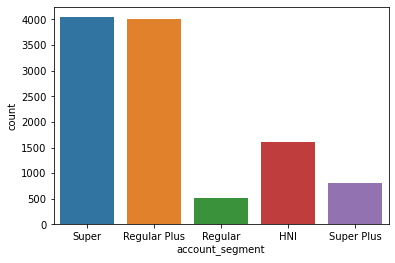

In [76]:
sns.countplot(data = df, x = 'account_segment')                                                  ## count plot
plt.show()

#### (l) CC_Agent_Score:

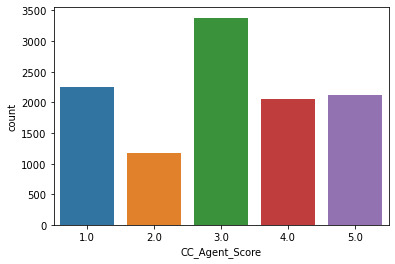

In [77]:
sns.countplot(data = df, x = 'CC_Agent_Score')                                                  ## count plot
plt.show()

#### (m) Marital_Status:

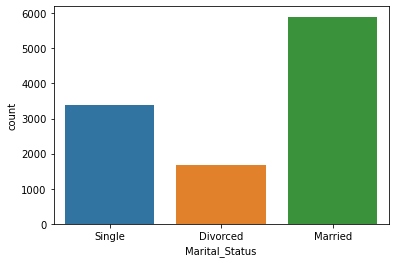

In [78]:
sns.countplot(data = df, x = 'Marital_Status')                                                  ## count plot
plt.show()

#### (n) coupon_used_for_payment:

In [79]:
print('Range of values: ', df['coupon_used_for_payment'].max()-df['coupon_used_for_payment'].min())

Range of values:  16.0


In [80]:
# Central values:

print('Minimum Age: ', df['coupon_used_for_payment'].min())
print('Maximum Age: ', df['coupon_used_for_payment'].max())
print('Mean value: ', df['coupon_used_for_payment'].mean())
print('Median value: ', df['coupon_used_for_payment'].median())
print('Standard deviation: ', df['coupon_used_for_payment'].std())
print('Null values: ', df['coupon_used_for_payment'].isnull().any())

Minimum Age:  0.0
Maximum Age:  16.0
Mean value:  1.802426343154246
Median value:  1.0
Standard deviation:  1.979277230726824
Null values:  False


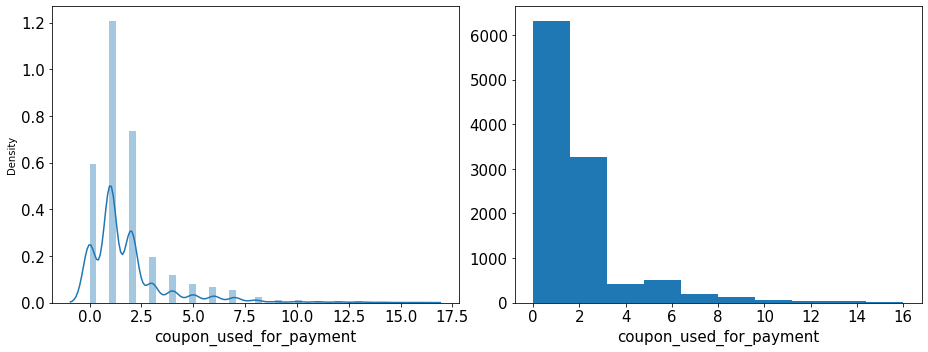

In [81]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['coupon_used_for_payment'],ax=ax2)
ax2.set_xlabel('coupon_used_for_payment', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['coupon_used_for_payment'])
ax3.set_xlabel('coupon_used_for_payment', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (o) Day_Since_CC_connect:

In [82]:
print('Range of values: ', df['Day_Since_CC_connect'].max()-df['Day_Since_CC_connect'].min())

Range of values:  47.0


In [83]:
# Central values:

print('Minimum Age: ', df['Day_Since_CC_connect'].min())
print('Maximum Age: ', df['Day_Since_CC_connect'].max())
print('Mean value: ', df['Day_Since_CC_connect'].mean())
print('Median value: ', df['Day_Since_CC_connect'].median())
print('Standard deviation: ', df['Day_Since_CC_connect'].std())
print('Null values: ', df['Day_Since_CC_connect'].isnull().any())

Minimum Age:  0.0
Maximum Age:  47.0
Mean value:  4.595913527319165
Median value:  3.0
Standard deviation:  3.6530060616492475
Null values:  False


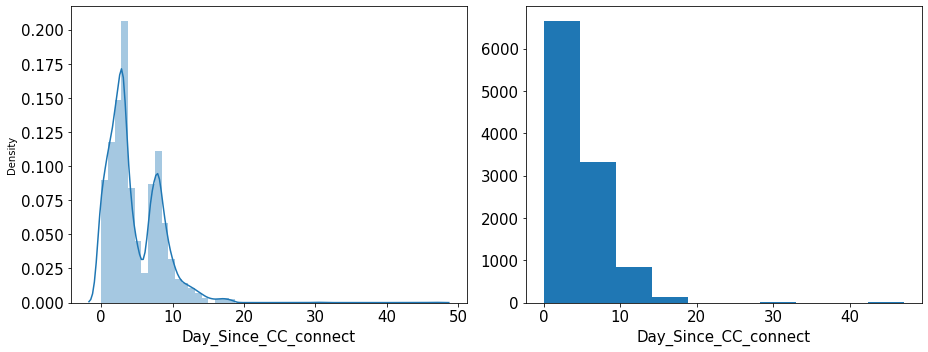

In [84]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['Day_Since_CC_connect'],ax=ax2)
ax2.set_xlabel('Day_Since_CC_connect', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Day_Since_CC_connect'])
ax3.set_xlabel('Day_Since_CC_connect', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (p) Login_device:

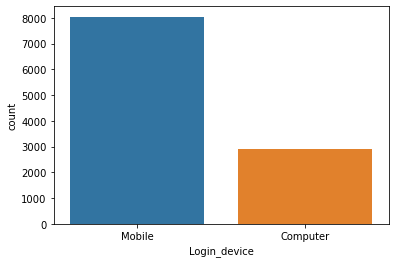

In [85]:
sns.countplot(data = df, x = 'Login_device')                                                  ## count plot
plt.show()

#### (q) rev_growth_yoy:

In [86]:
print('Range of values: ', df['rev_growth_yoy'].max()-df['rev_growth_yoy'].min())

Range of values:  24.0


In [87]:
# Central values:

print('Minimum Age: ', df['rev_growth_yoy'].min())
print('Maximum Age: ', df['rev_growth_yoy'].max())
print('Mean value: ', df['rev_growth_yoy'].mean())
print('Median value: ', df['rev_growth_yoy'].median())
print('Standard deviation: ', df['rev_growth_yoy'].std())
print('Null values: ', df['rev_growth_yoy'].isnull().any())

Minimum Age:  4.0
Maximum Age:  28.0
Mean value:  16.2058743044787
Median value:  15.0
Standard deviation:  3.7600481652935267
Null values:  False


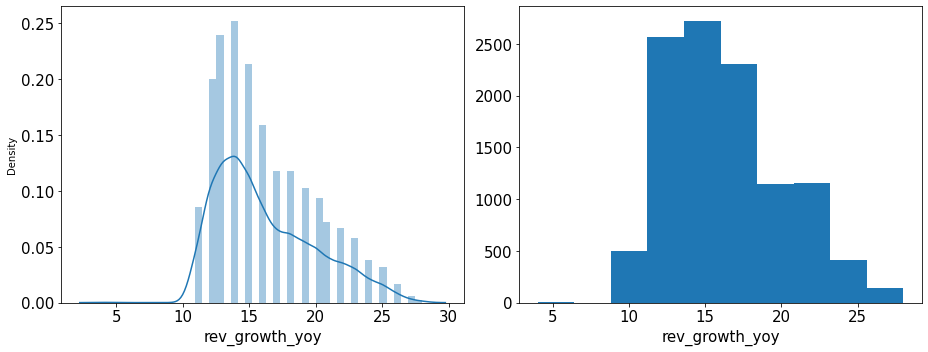

In [88]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['rev_growth_yoy'],ax=ax2)
ax2.set_xlabel('rev_growth_yoy', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['rev_growth_yoy'])
ax3.set_xlabel('rev_growth_yoy', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### (r) cashback:

In [89]:
print('Range of values: ', df['cashback'].max()-df['cashback'].min())

Range of values:  1997.0


In [90]:
# Central values:

print('Minimum Age: ', df['cashback'].min())
print('Maximum Age: ', df['cashback'].max())
print('Mean value: ', df['cashback'].mean())
print('Median value: ', df['cashback'].median())
print('Standard deviation: ', df['cashback'].std())
print('Null values: ', df['cashback'].isnull().any())

Minimum Age:  0.0
Maximum Age:  1997.0
Mean value:  195.63669615981127
Median value:  165.25
Standard deviation:  177.13018607913318
Null values:  False


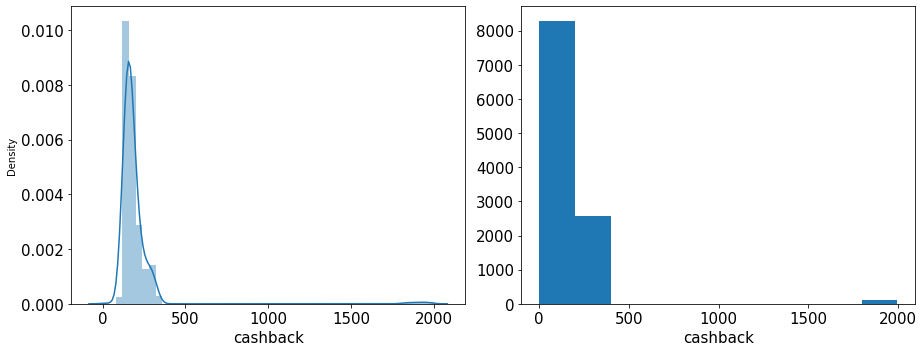

In [91]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))

#distplot
sns.distplot(df['cashback'],ax=ax2)
ax2.set_xlabel('cashback', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['cashback'])
ax3.set_xlabel('cashback', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Bivariate Analysis:

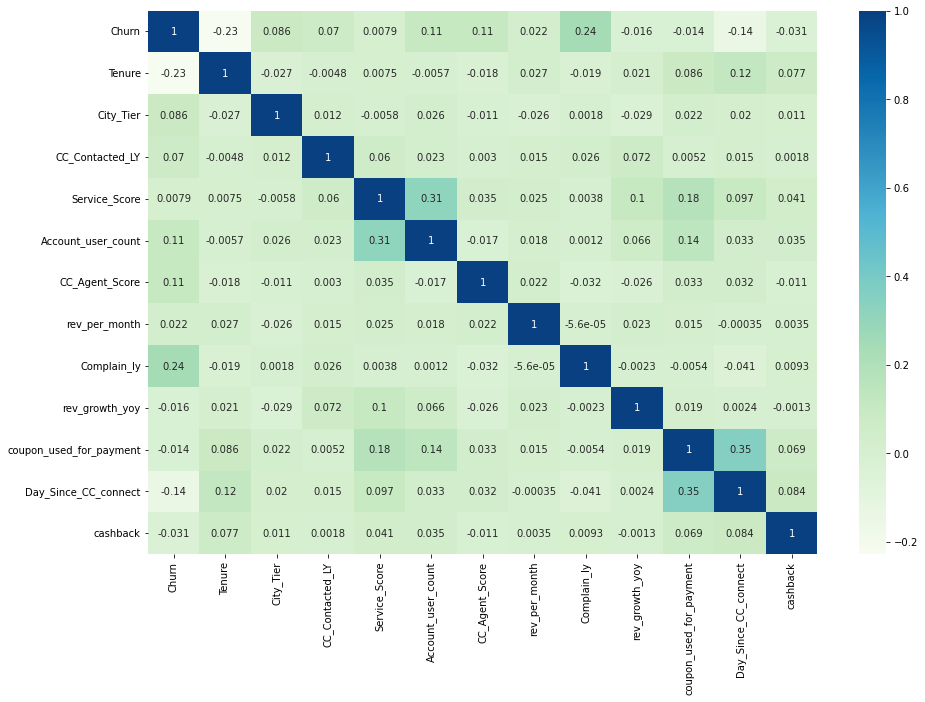

In [92]:
f, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), cmap = 'GnBu', annot = True)

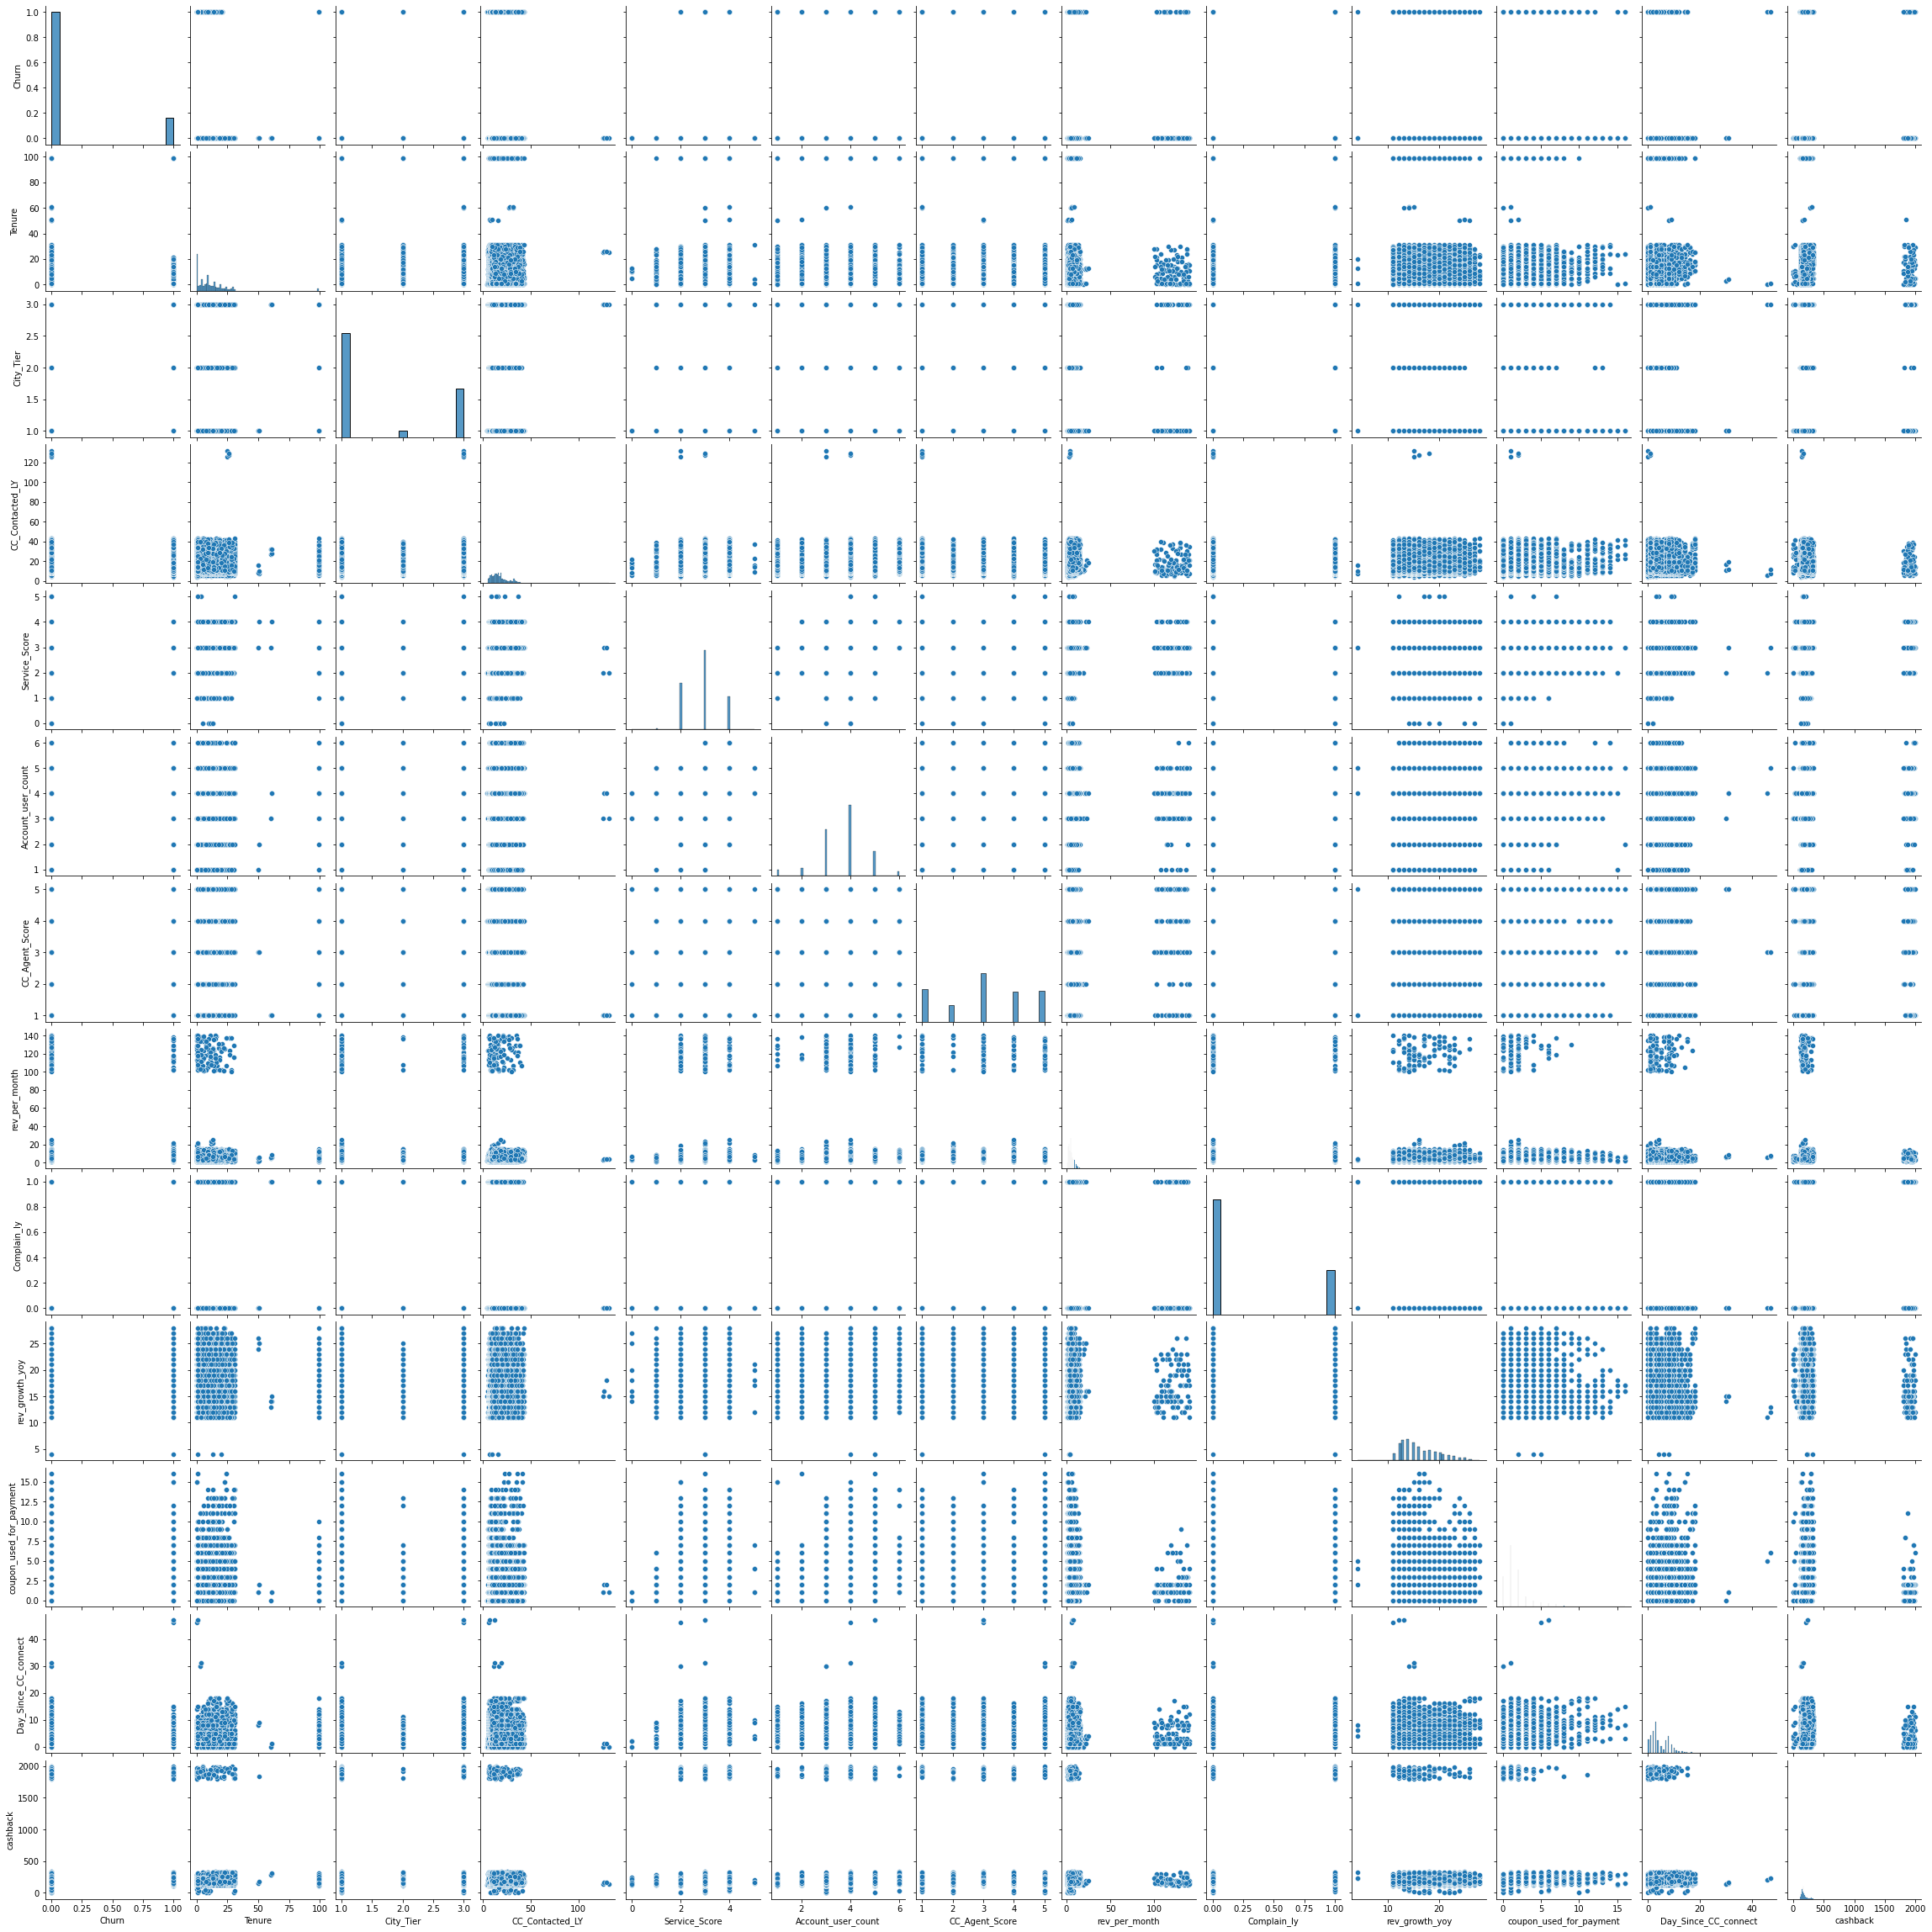

In [93]:
sns.pairplot(df)

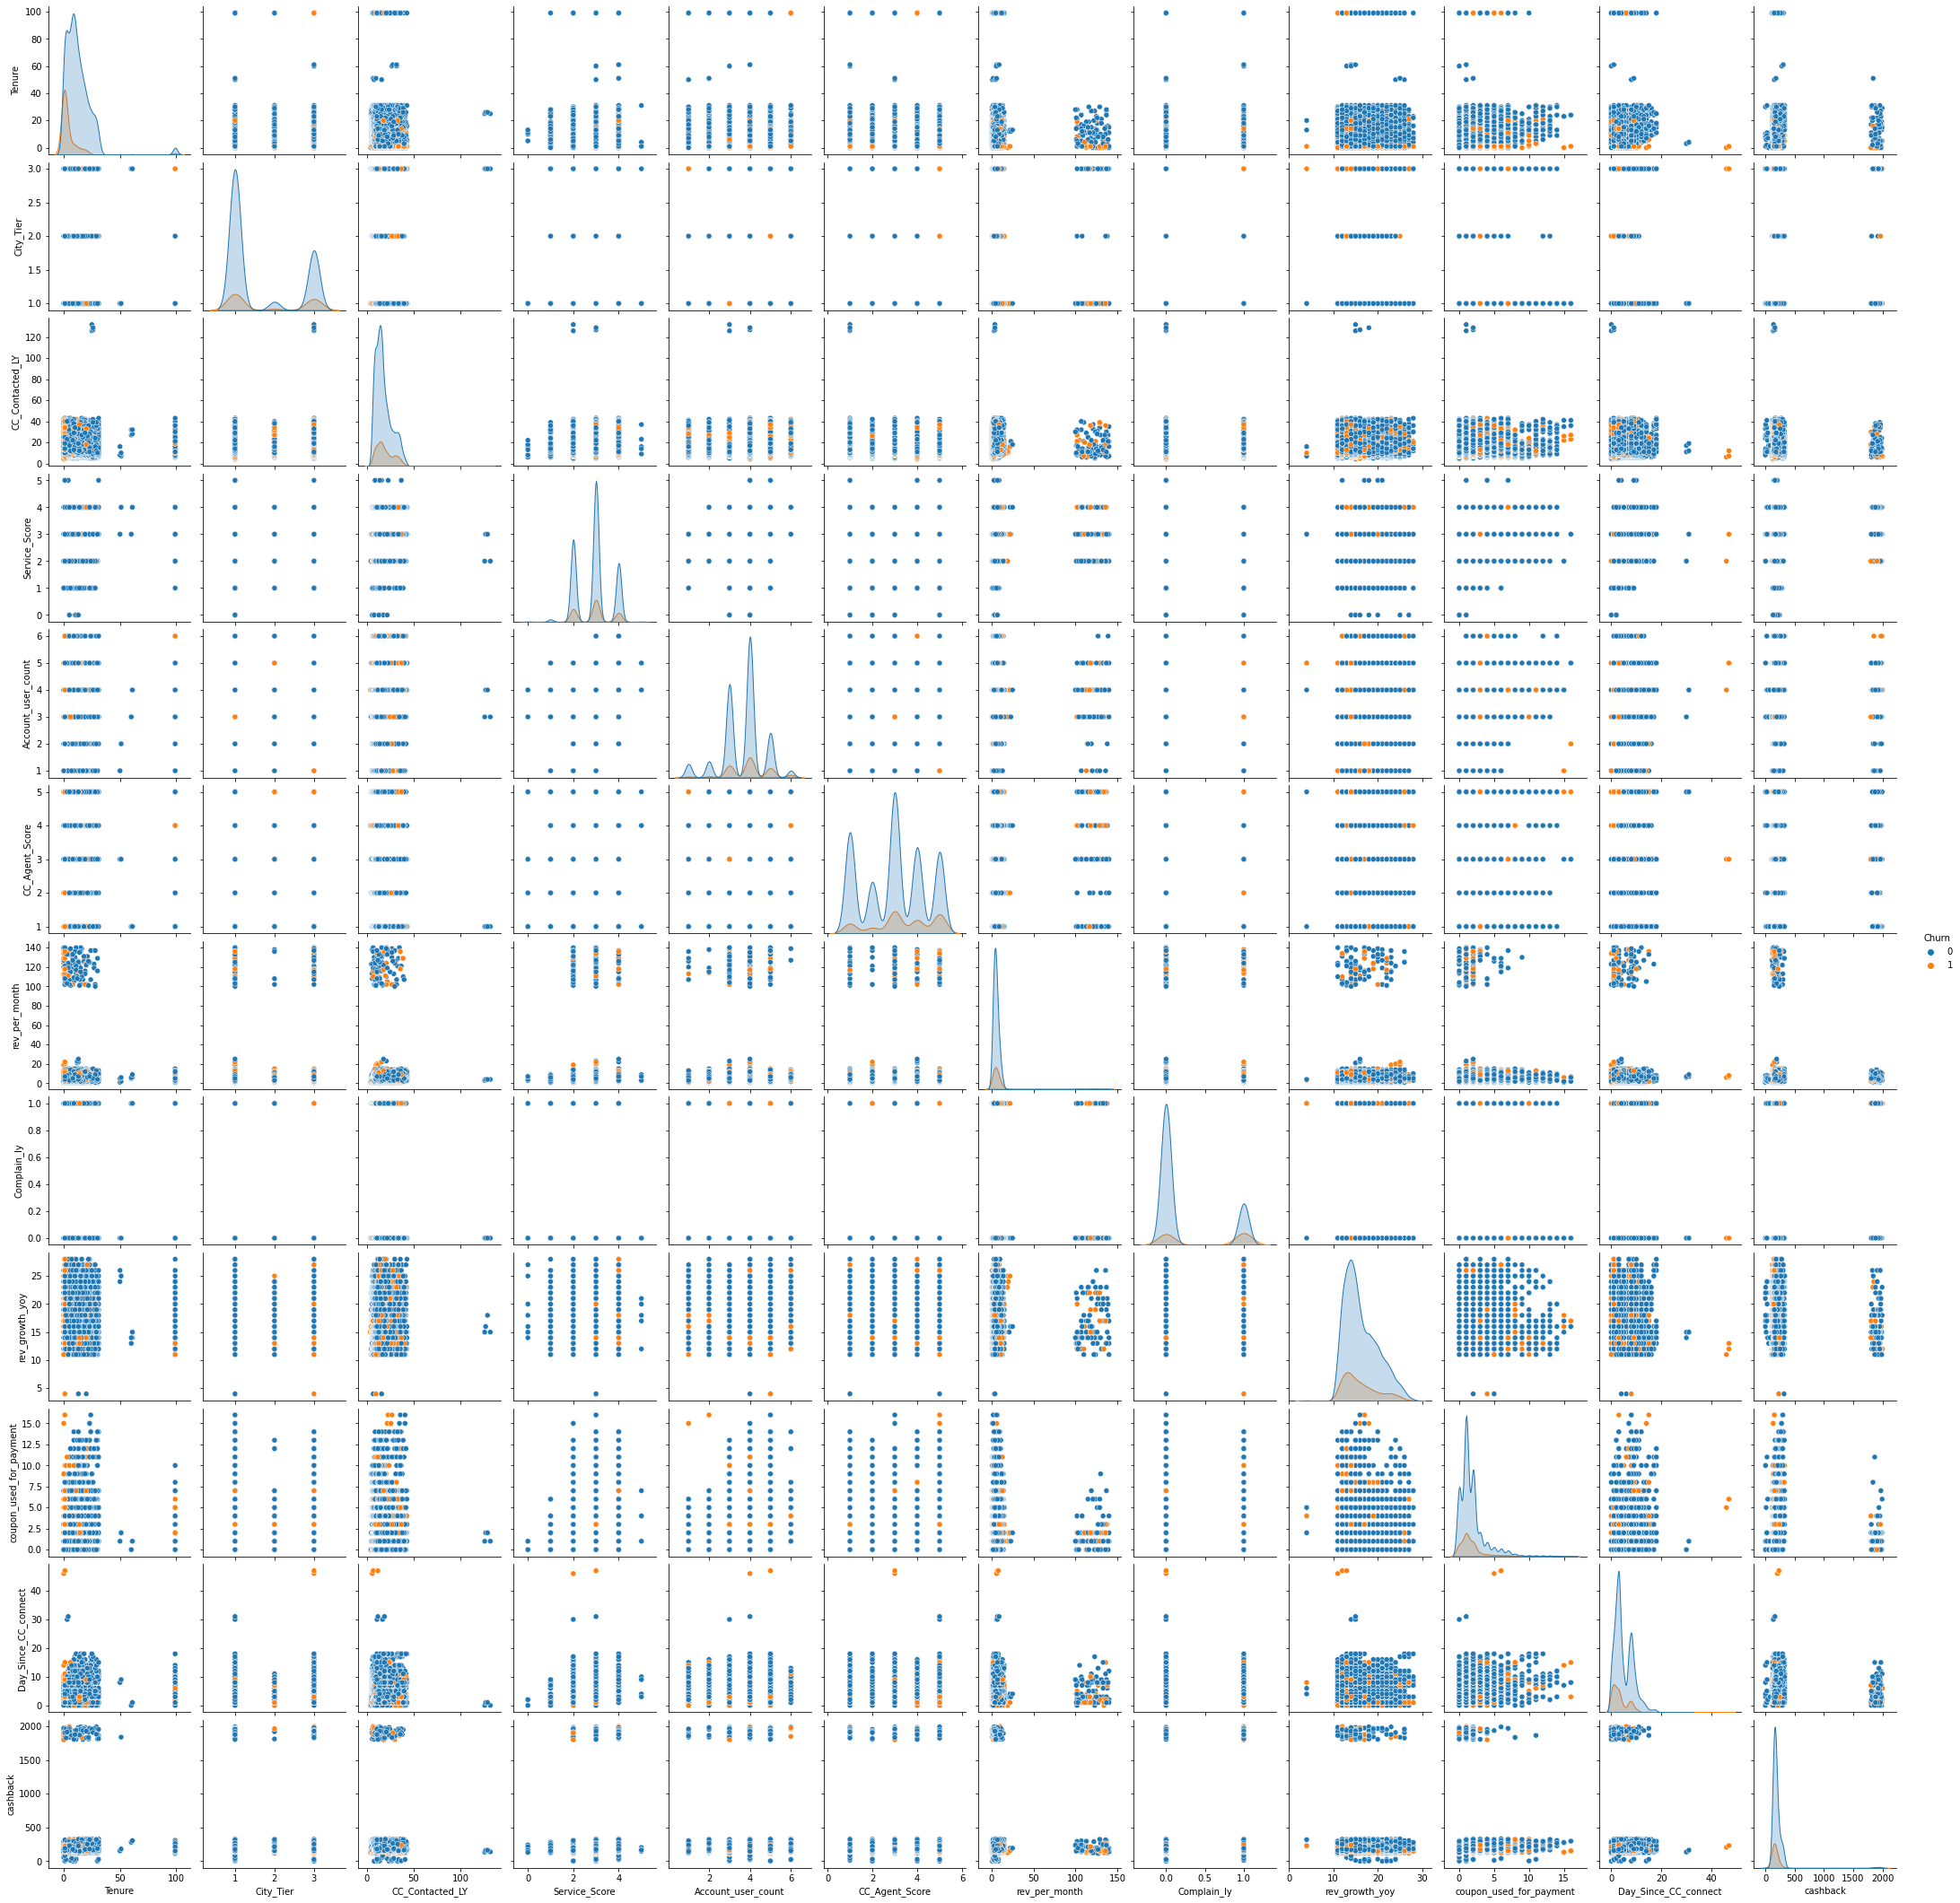

In [94]:
sns.pairplot(df, hue='Churn')

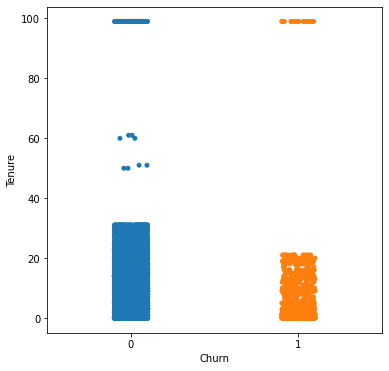

In [95]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Tenure'], jitter=True) 
plt.show()

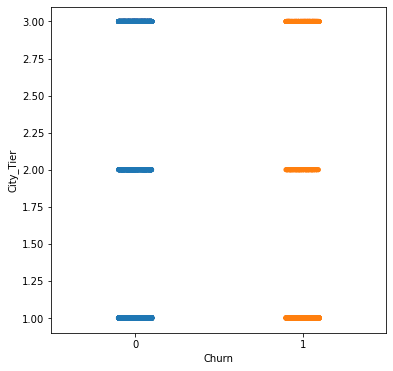

In [96]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['City_Tier'], jitter=True) 
plt.show()

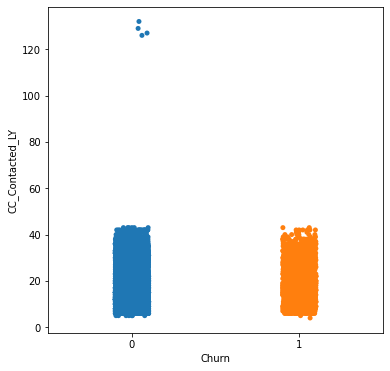

In [97]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['CC_Contacted_LY'], jitter=True) 
plt.show()

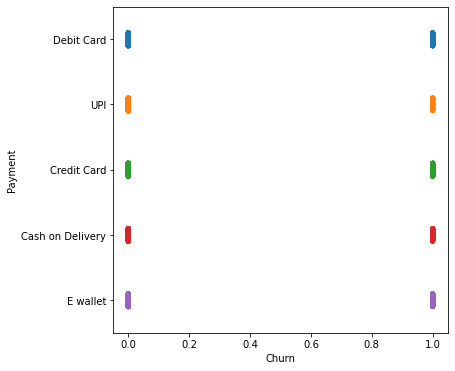

In [98]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Payment'], jitter=True) 
plt.show()

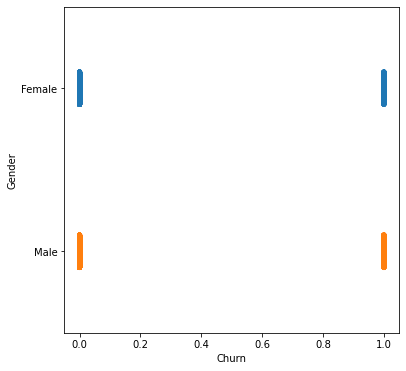

In [99]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Gender'], jitter=True) 
plt.show()

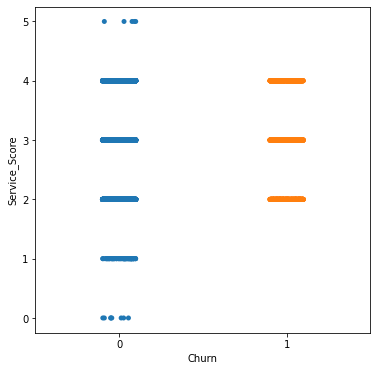

In [100]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Service_Score'], jitter=True) 
plt.show()

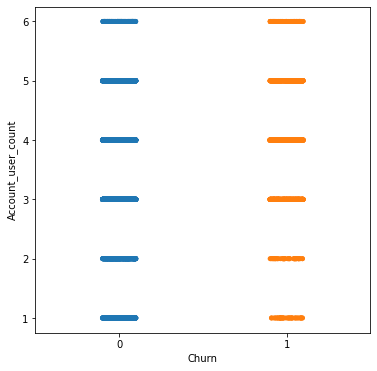

In [101]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Account_user_count'], jitter=True) 
plt.show()

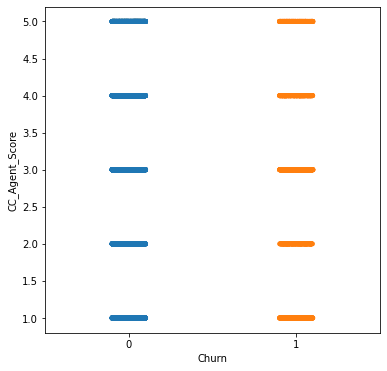

In [102]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['CC_Agent_Score'], jitter=True) 
plt.show()

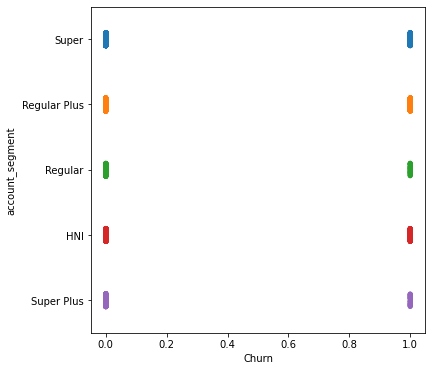

In [103]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['account_segment'], jitter=True) 
plt.show()

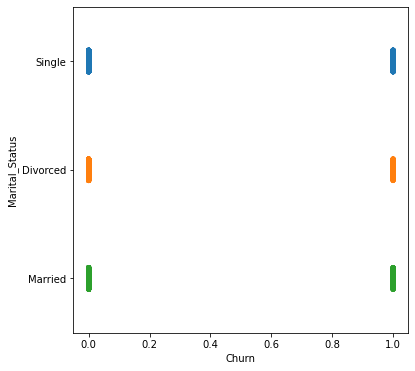

In [104]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Marital_Status'], jitter=True) 
plt.show()

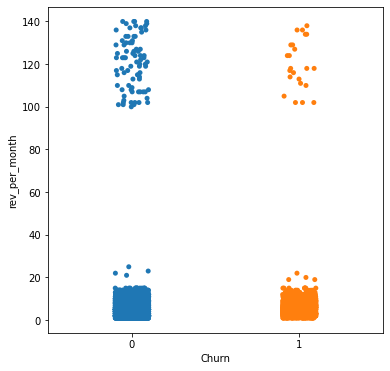

In [105]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['rev_per_month'], jitter=True) 
plt.show()

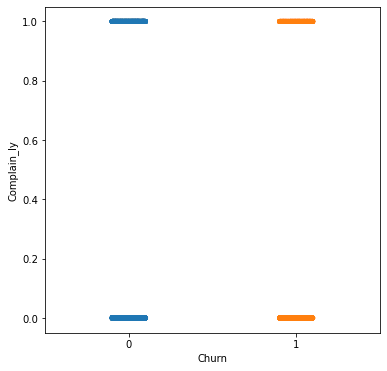

In [106]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Complain_ly'], jitter=True) 
plt.show()

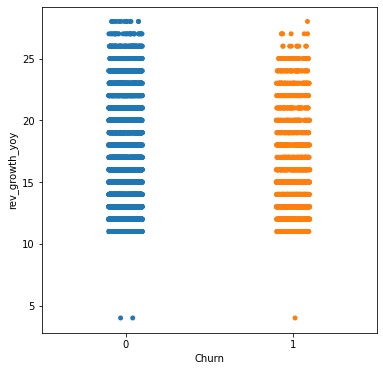

In [107]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['rev_growth_yoy'], jitter=True) 
plt.show()

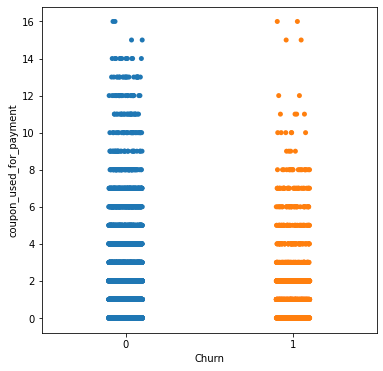

In [108]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['coupon_used_for_payment'], jitter=True) 
plt.show()

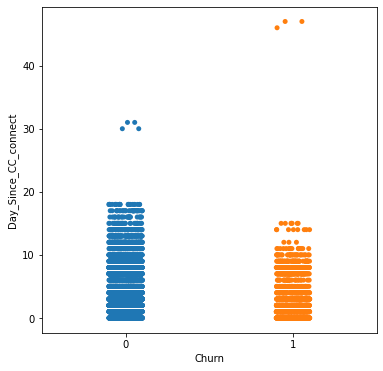

In [109]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Day_Since_CC_connect'], jitter=True) 
plt.show()

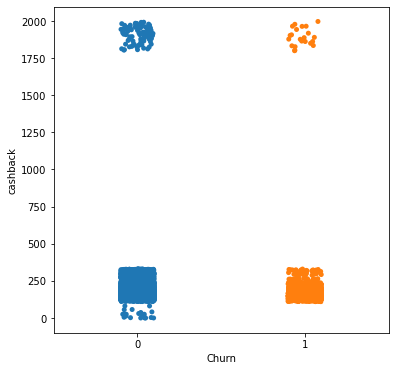

In [110]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['cashback'], jitter=True) 
plt.show()

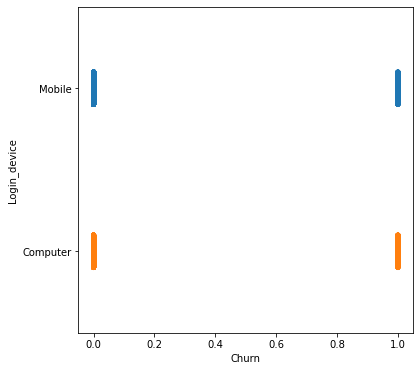

In [111]:
plt.figure(figsize=(6,6))
sns.stripplot(df["Churn"], df['Login_device'], jitter=True) 
plt.show()

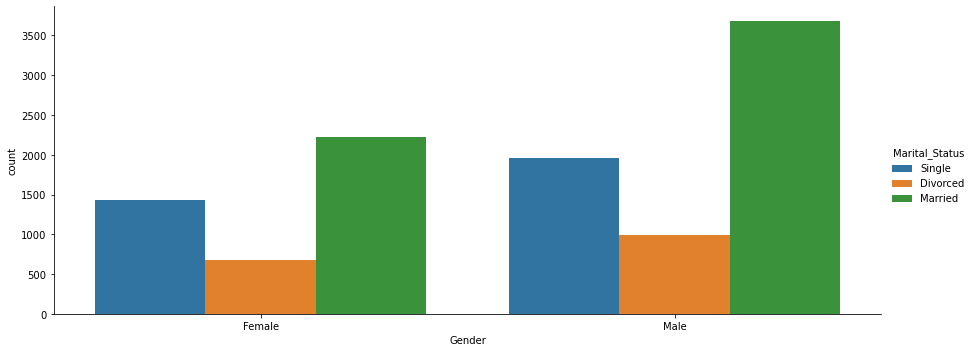

In [112]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Marital_Status')
plt.show()

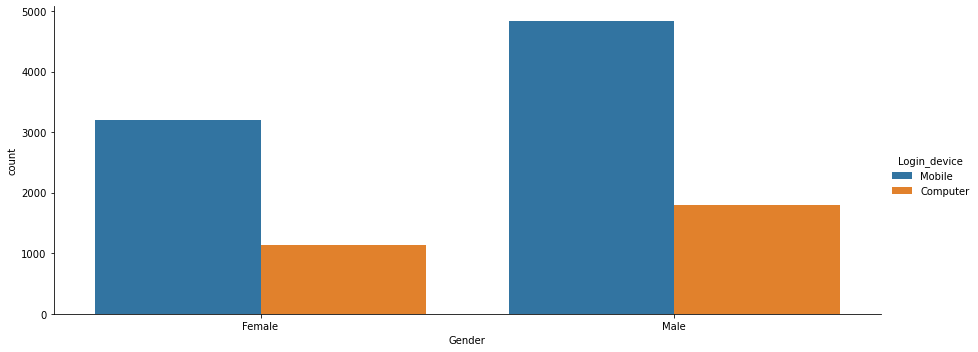

In [113]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Login_device')
plt.show()

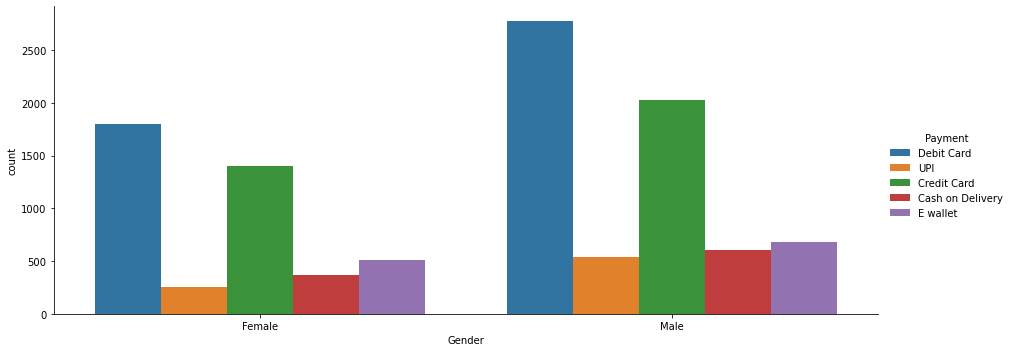

In [114]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Payment')
plt.show()

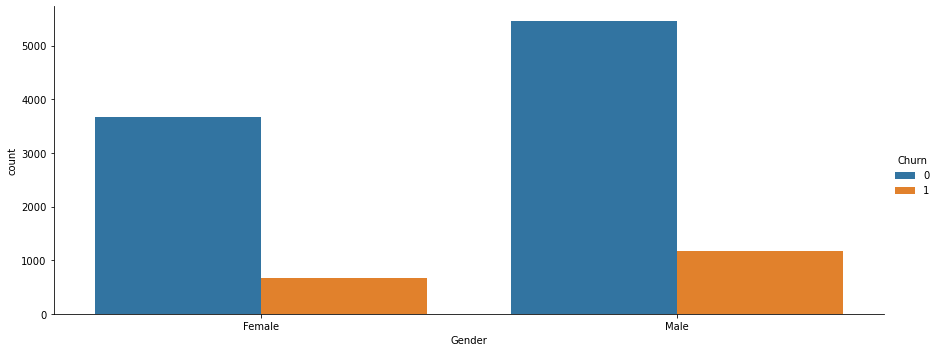

In [115]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Churn')
plt.show()

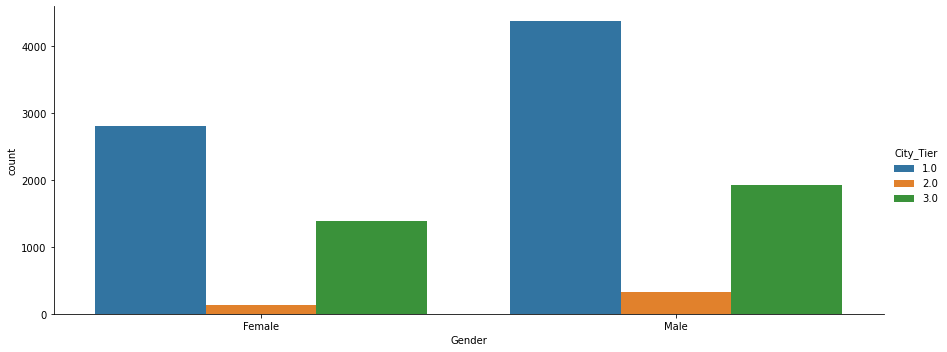

In [116]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'City_Tier')
plt.show()

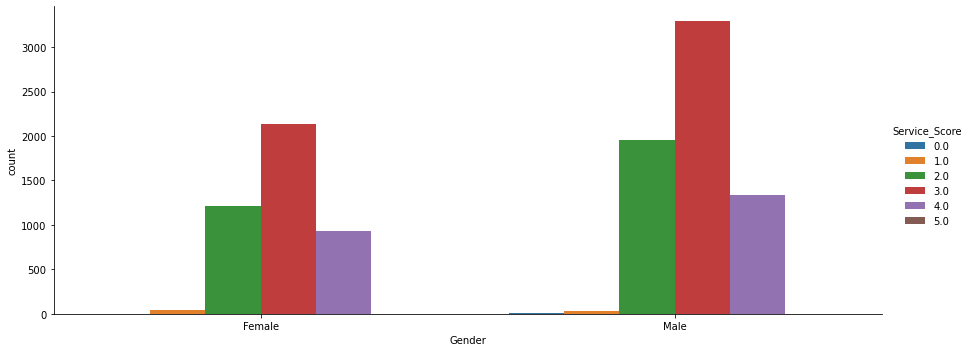

In [117]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Service_Score')
plt.show()

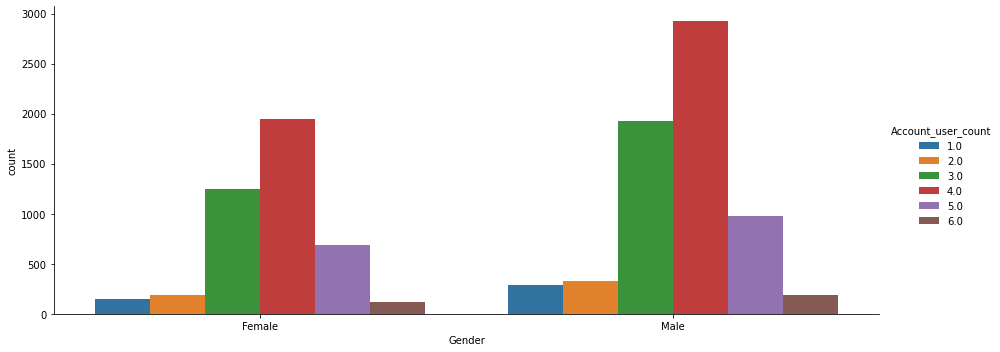

In [118]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Account_user_count')
plt.show()

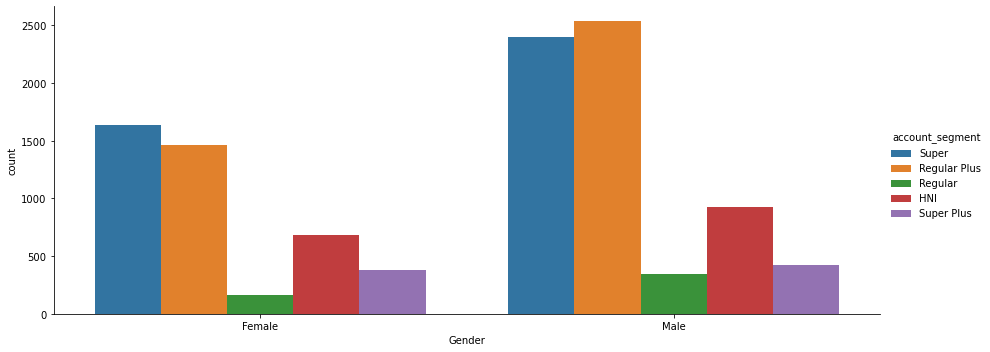

In [119]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'account_segment')
plt.show()

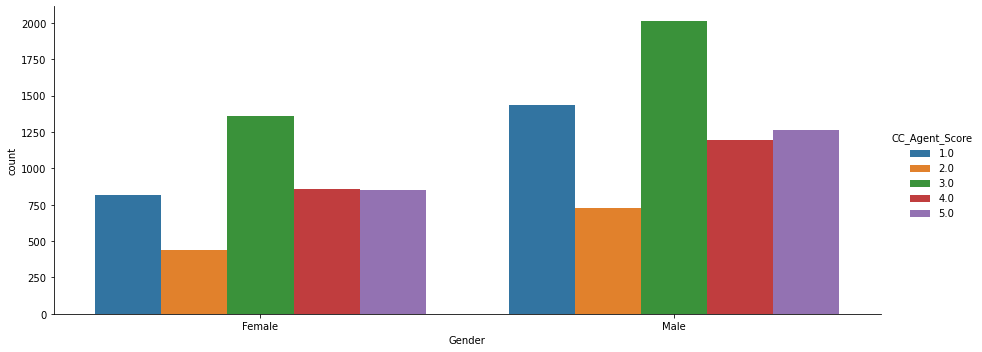

In [120]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'CC_Agent_Score')
plt.show()

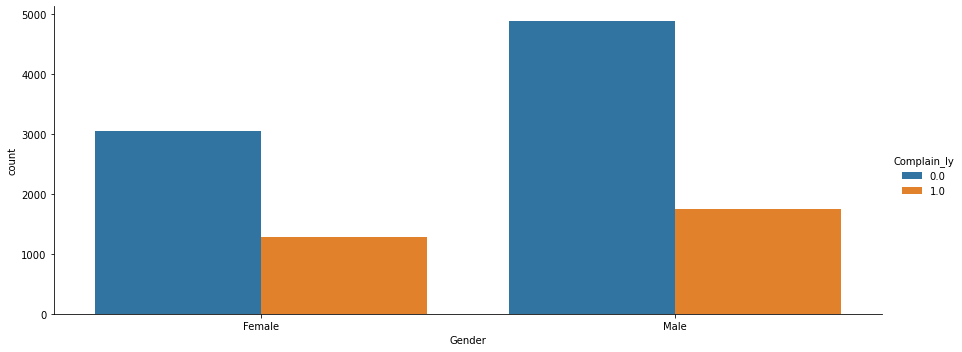

In [121]:
sns.catplot('Gender', data= df, kind='count',aspect=2.5, hue= 'Complain_ly')
plt.show()

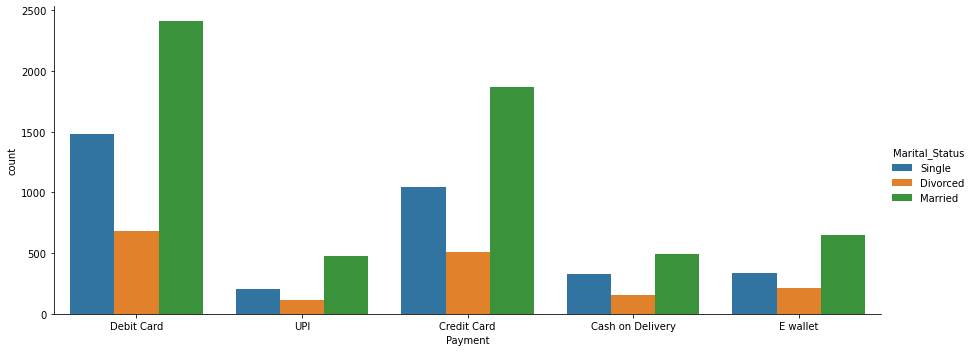

In [122]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Marital_Status')
plt.show()

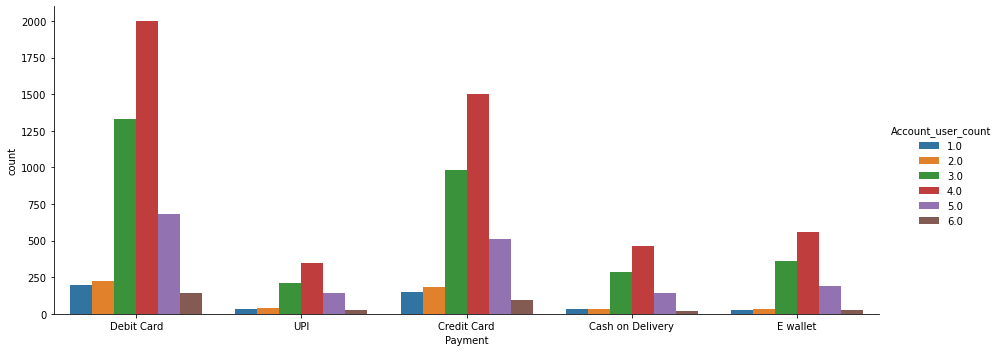

In [123]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Account_user_count')
plt.show()

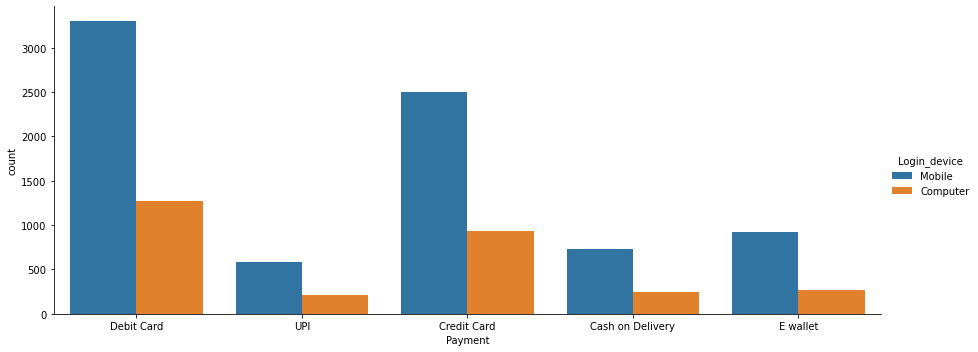

In [124]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Login_device')
plt.show()

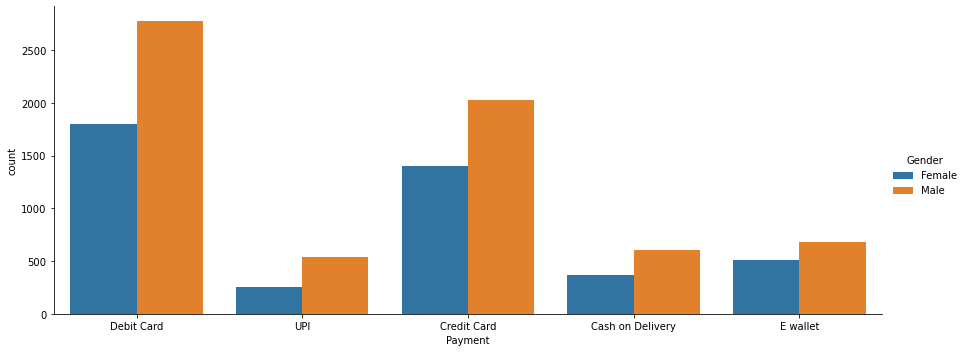

In [125]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Gender')
plt.show()

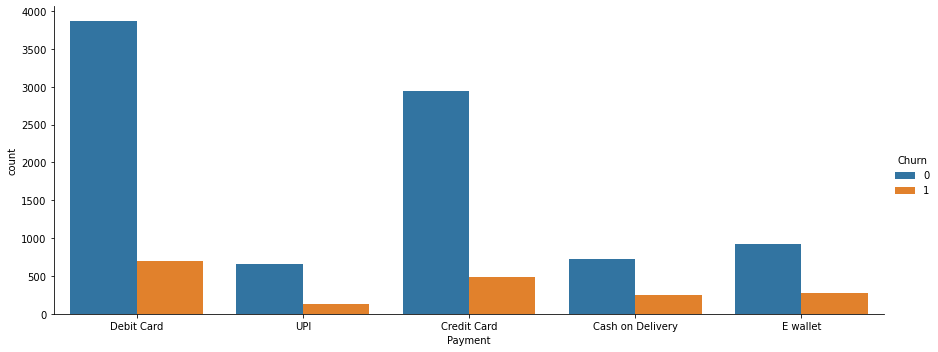

In [126]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Churn')
plt.show()

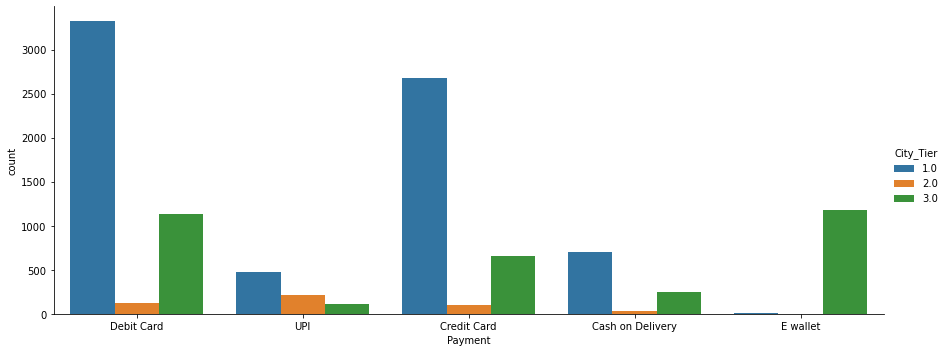

In [127]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'City_Tier')
plt.show()

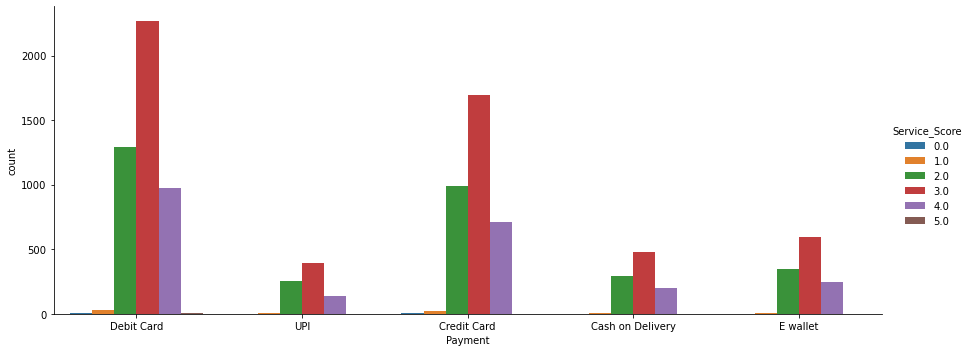

In [128]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Service_Score')
plt.show()

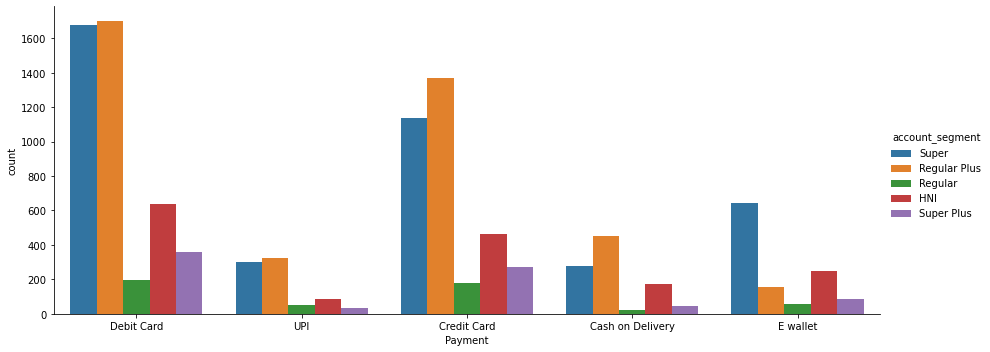

In [129]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'account_segment')
plt.show()

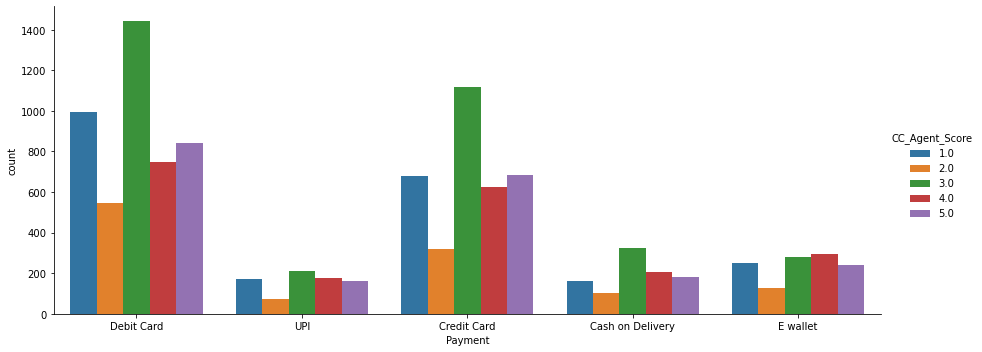

In [130]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'CC_Agent_Score')
plt.show()

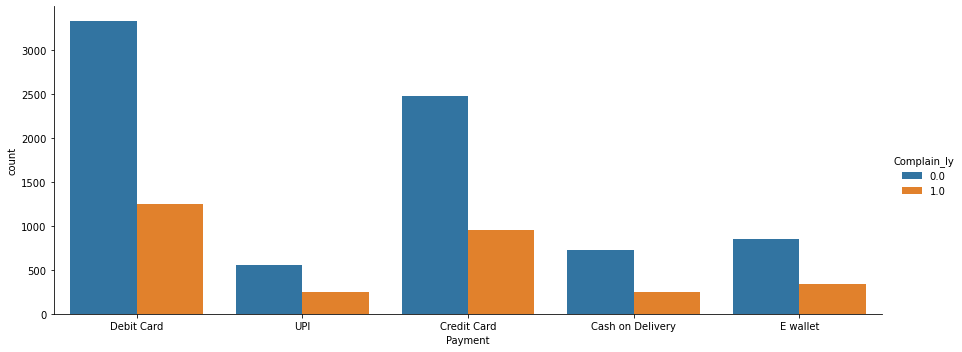

In [131]:
sns.catplot('Payment', data= df, kind='count',aspect=2.5, hue= 'Complain_ly')
plt.show()

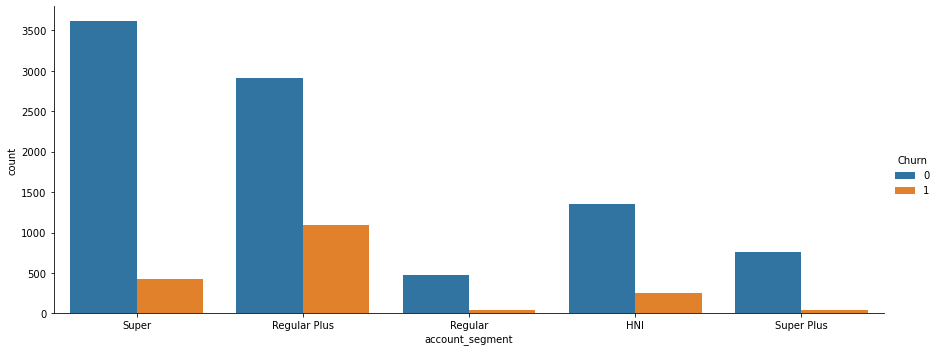

In [132]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Churn')
plt.show()

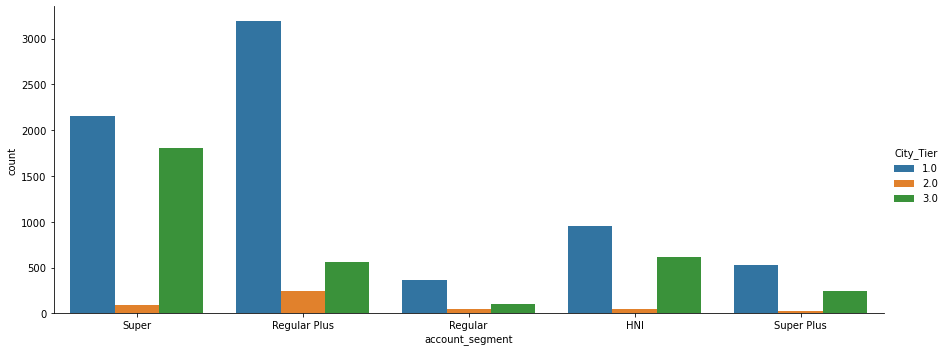

In [133]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'City_Tier')
plt.show()

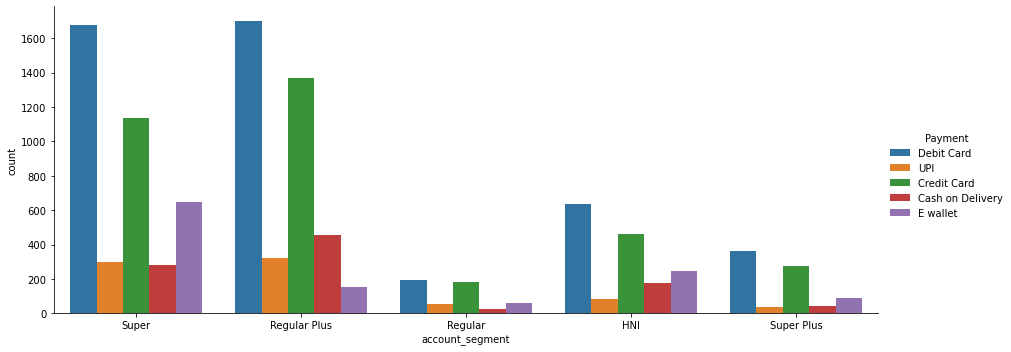

In [134]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Payment')
plt.show()

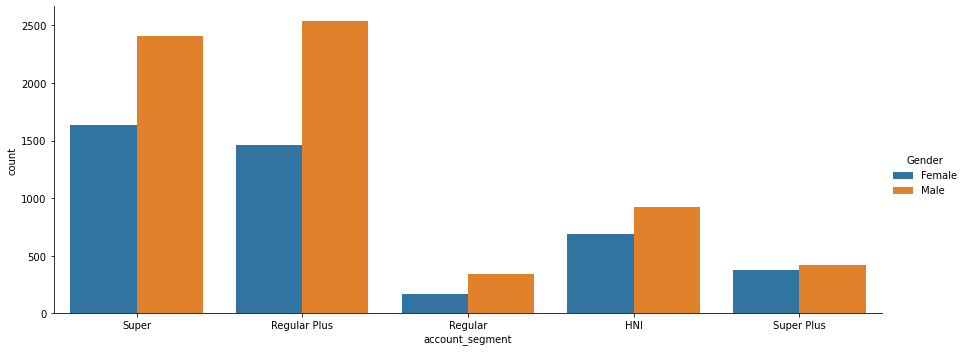

In [135]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Gender')
plt.show()

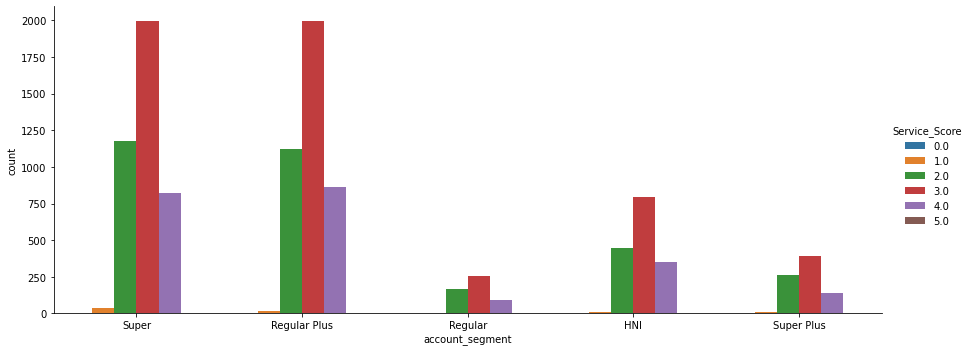

In [136]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Service_Score')
plt.show()

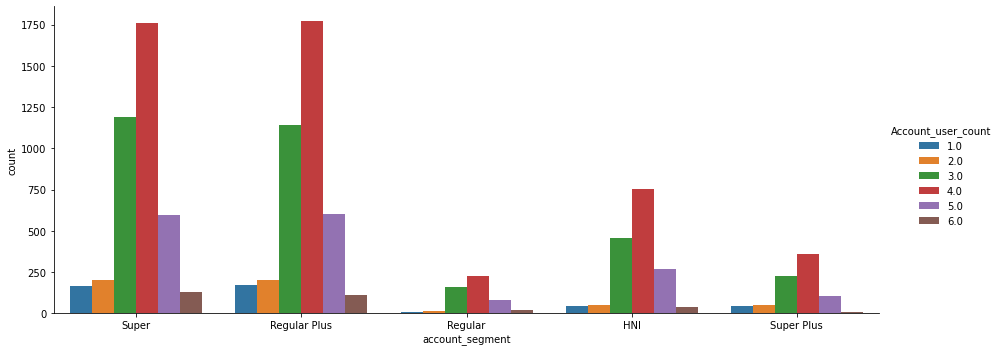

In [137]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Account_user_count')
plt.show()

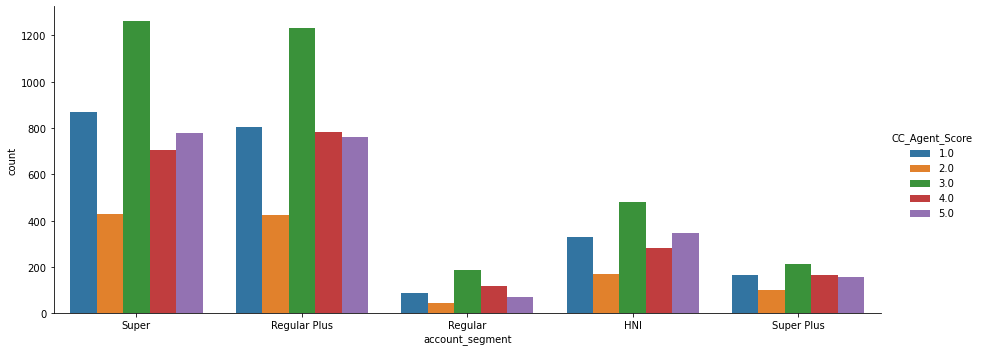

In [138]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'CC_Agent_Score')
plt.show()

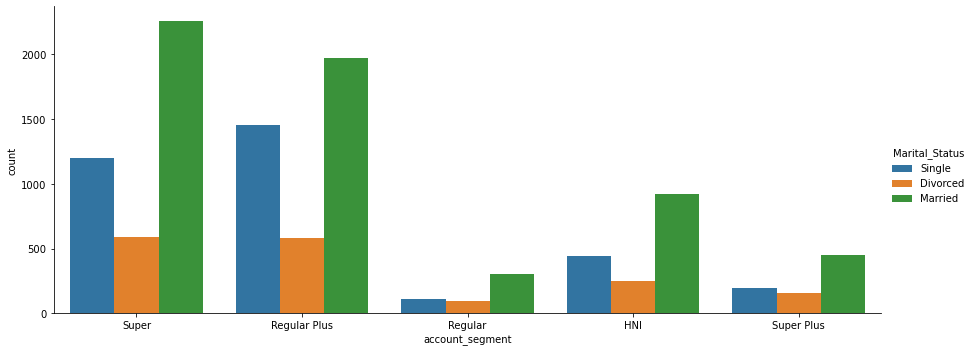

In [139]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Marital_Status')
plt.show()

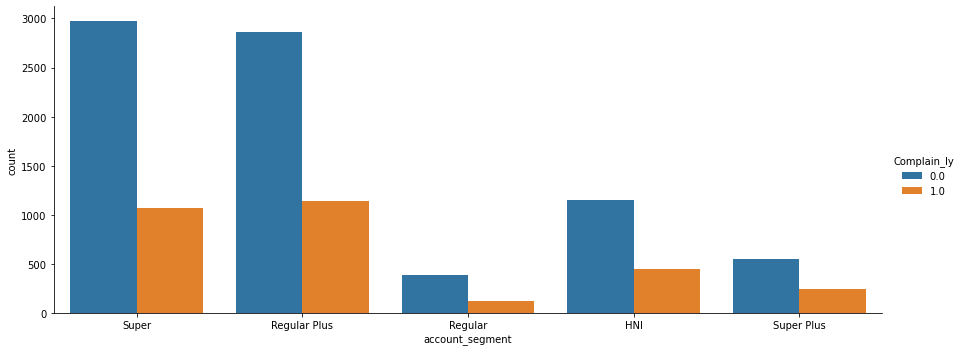

In [140]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Complain_ly')
plt.show()

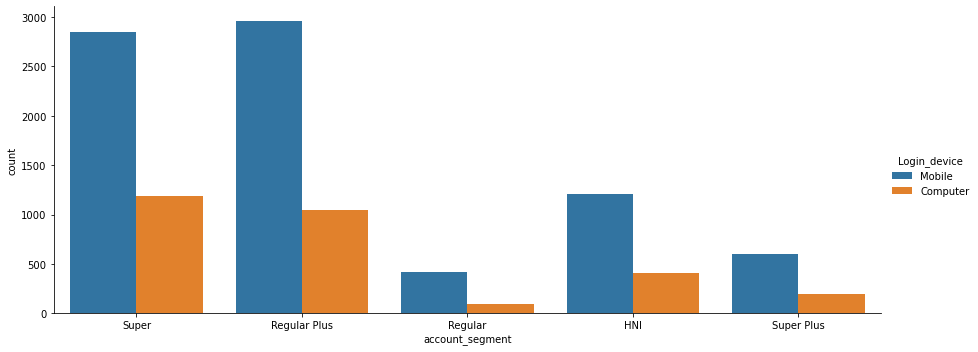

In [141]:
sns.catplot('account_segment', data= df, kind='count',aspect=2.5, hue= 'Login_device')
plt.show()

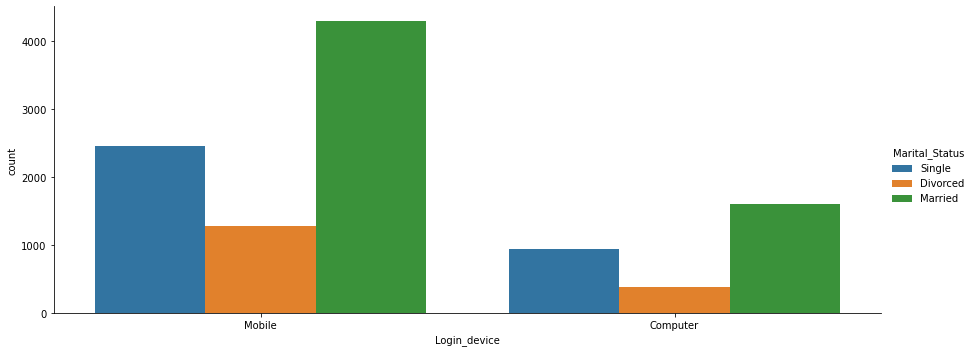

In [142]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Marital_Status')
plt.show()

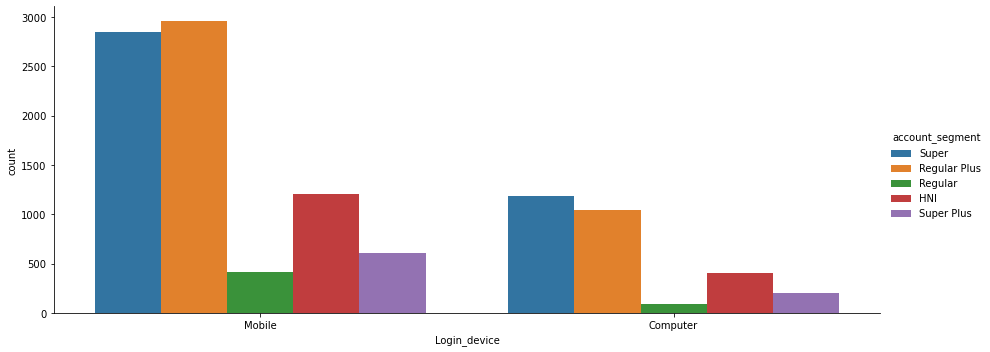

In [143]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'account_segment')
plt.show()

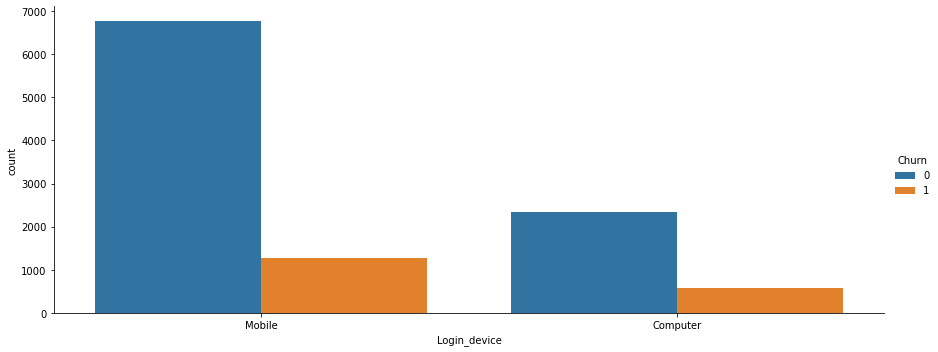

In [144]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Churn')
plt.show()

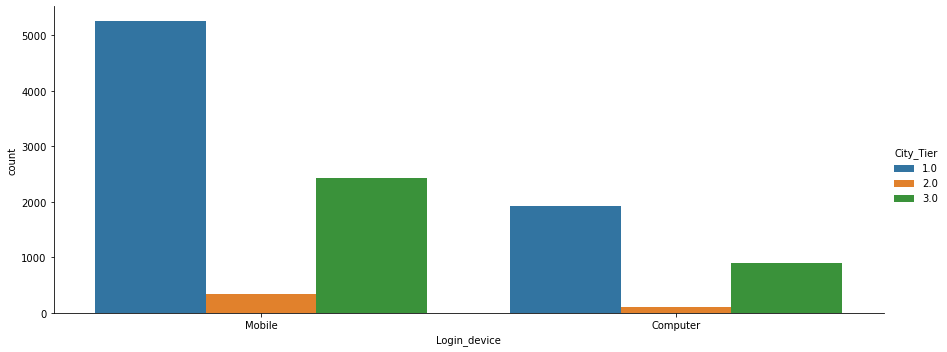

In [145]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'City_Tier')
plt.show()

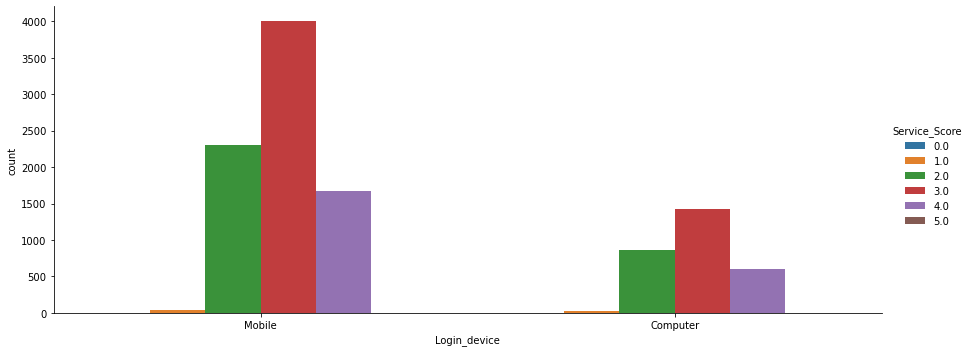

In [146]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Service_Score')
plt.show()

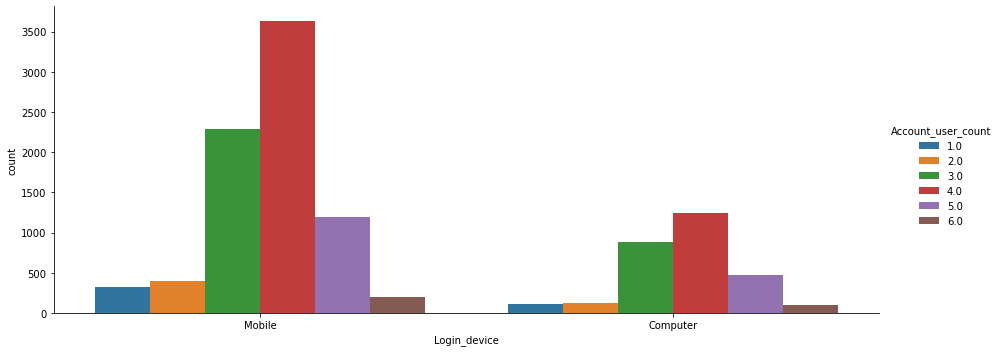

In [147]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Account_user_count')
plt.show()

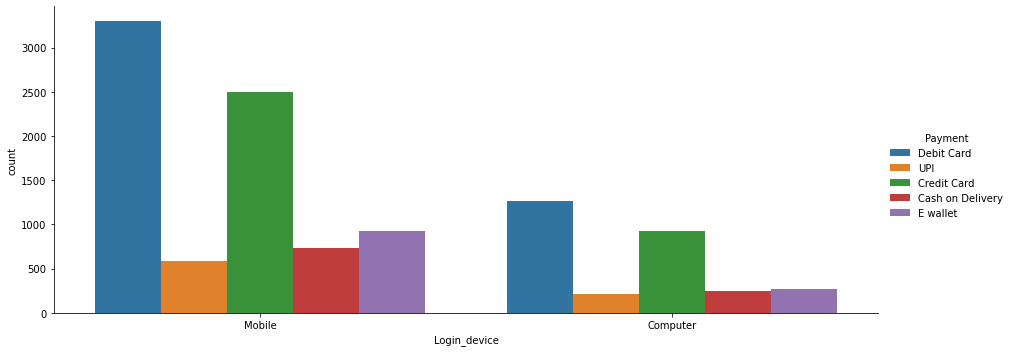

In [148]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Payment')
plt.show()

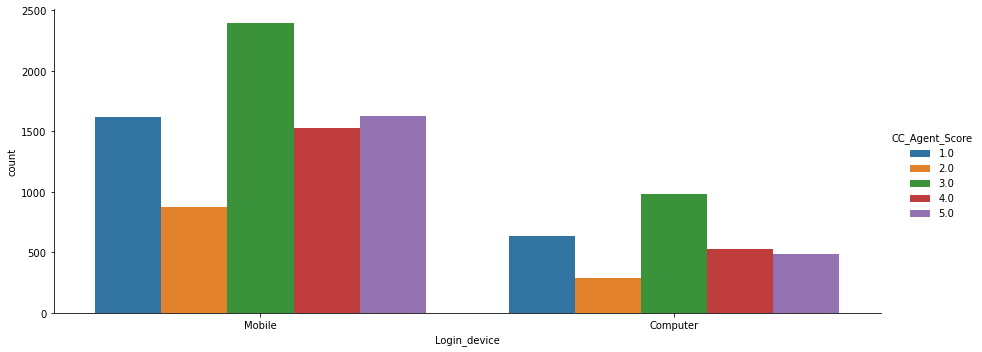

In [149]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'CC_Agent_Score')
plt.show()

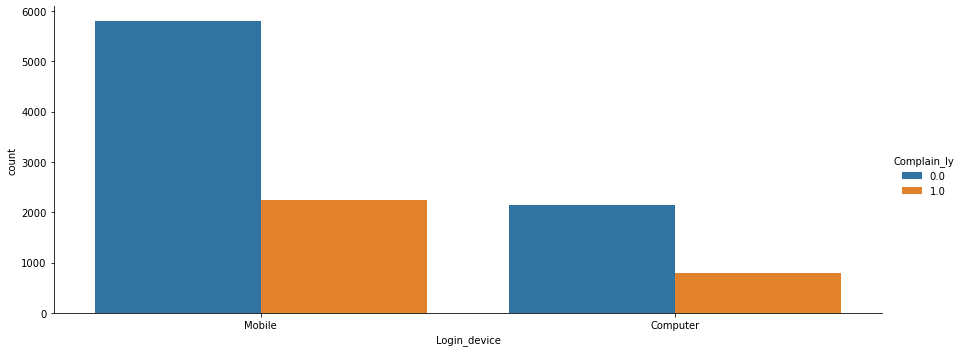

In [150]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Complain_ly')
plt.show()

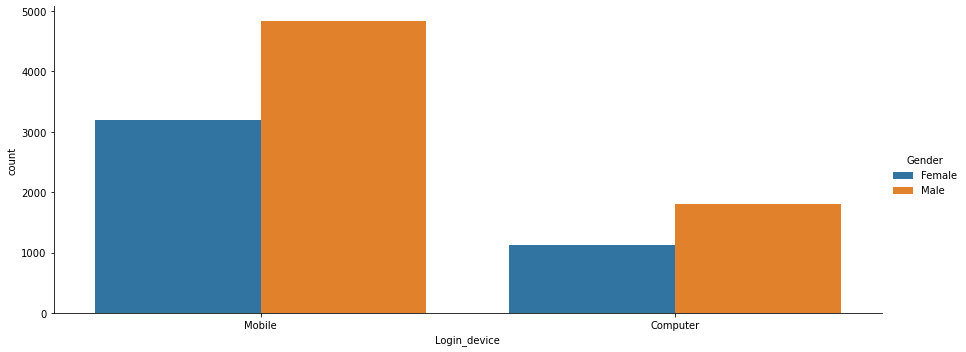

In [151]:
sns.catplot('Login_device', data= df, kind='count',aspect=2.5, hue= 'Gender')
plt.show()

### Outlier Checks:

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10963 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    10963 non-null  int64  
 1   Tenure                   10963 non-null  float64
 2   City_Tier                10963 non-null  float64
 3   CC_Contacted_LY          10963 non-null  float64
 4   Payment                  10963 non-null  object 
 5   Gender                   10963 non-null  object 
 6   Service_Score            10963 non-null  float64
 7   Account_user_count       10963 non-null  float64
 8   account_segment          10963 non-null  object 
 9   CC_Agent_Score           10963 non-null  float64
 10  Marital_Status           10963 non-null  object 
 11  rev_per_month            10963 non-null  float64
 12  Complain_ly              10963 non-null  float64
 13  rev_growth_yoy           10963 non-null  float64
 14  coupon_used_for_paymen

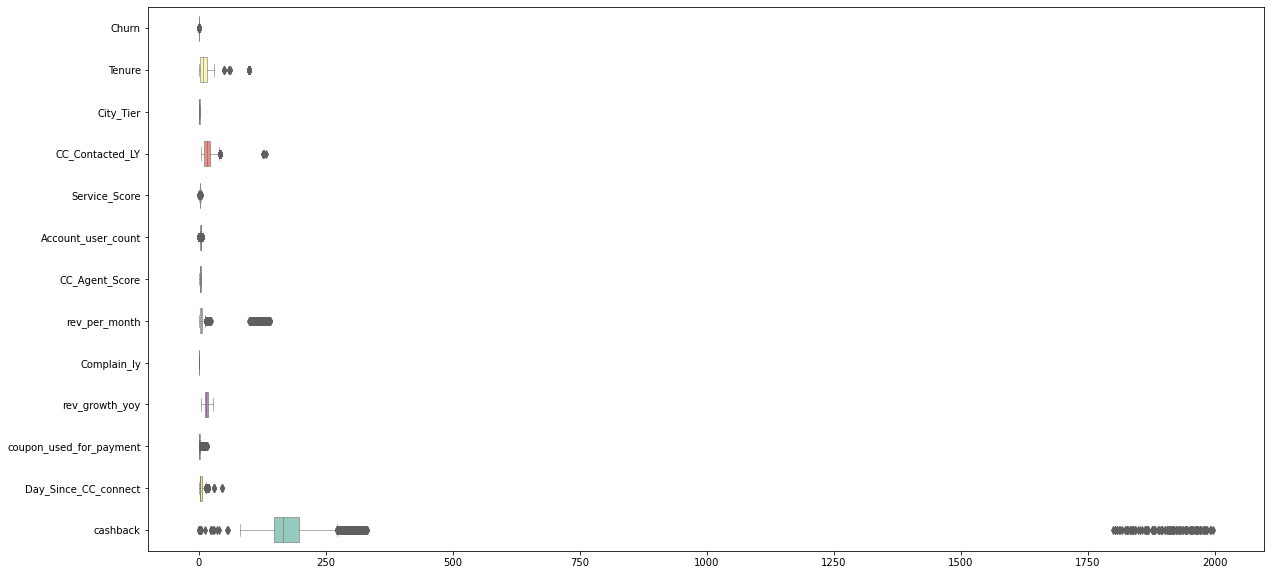

In [153]:
f, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

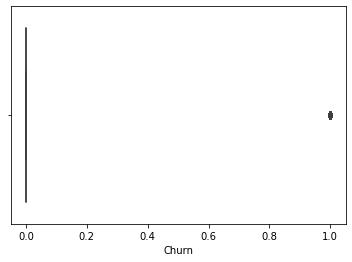

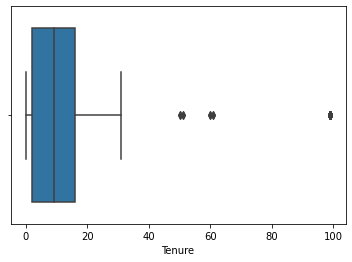

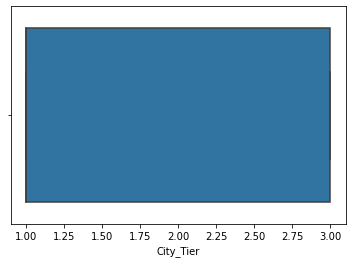

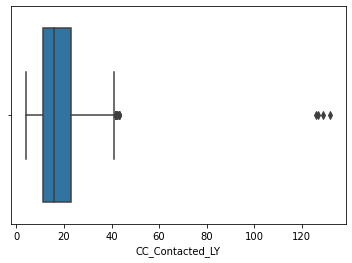

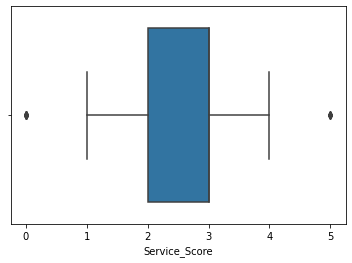

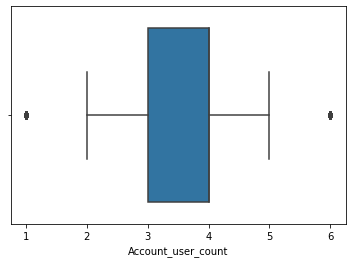

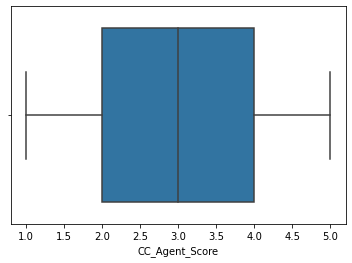

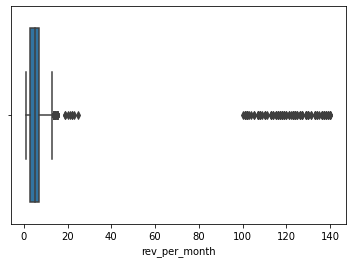

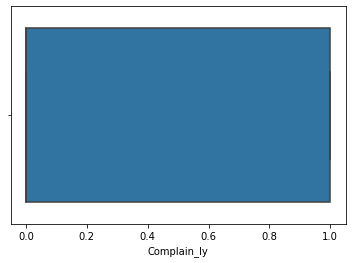

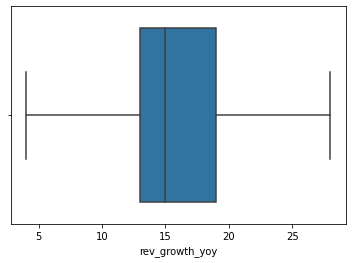

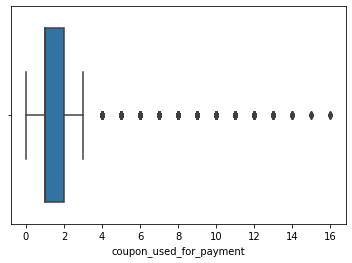

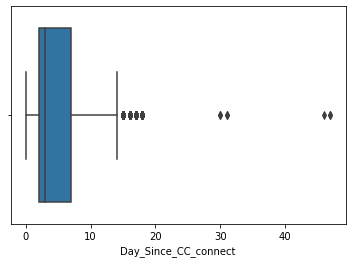

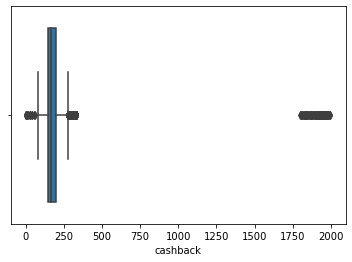

In [154]:
cols = ['Churn','Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score','Account_user_count','CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

### Treating the Outliers:

In [155]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [156]:
for feature in df[['rev_per_month','coupon_used_for_payment', 'cashback', 'Day_Since_CC_connect']]:
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

### Verifing the Outliers treatment:

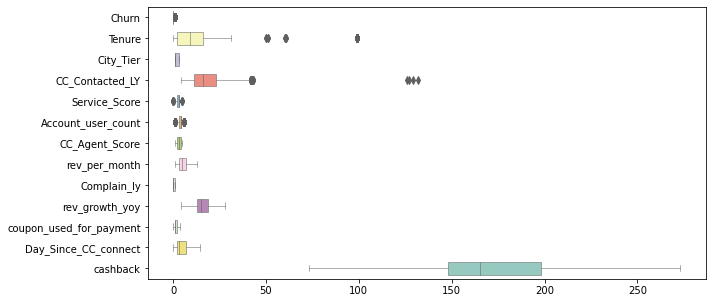

In [157]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

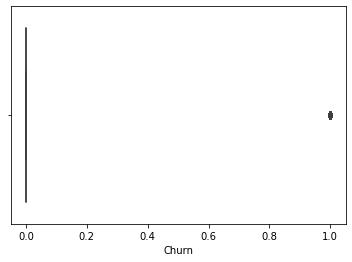

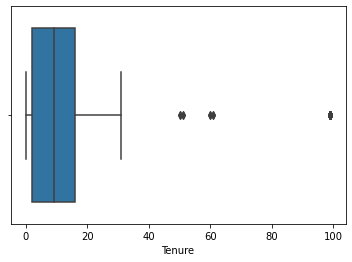

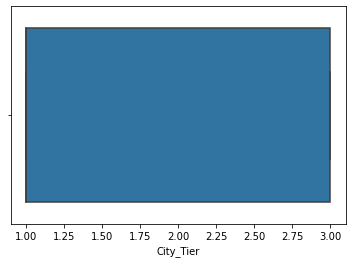

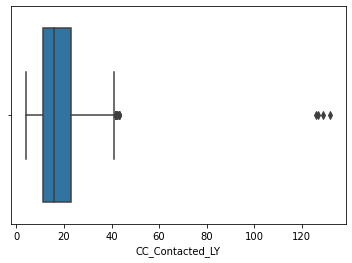

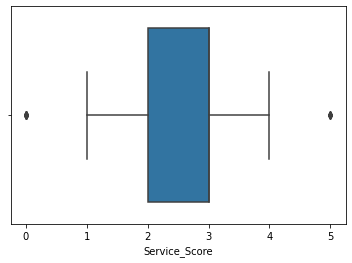

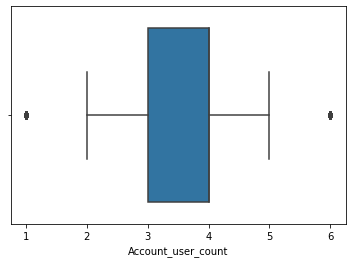

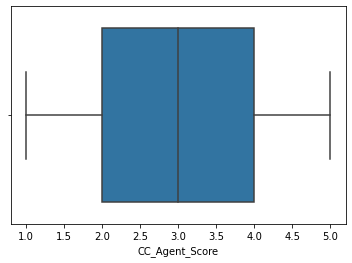

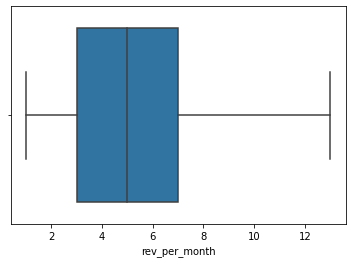

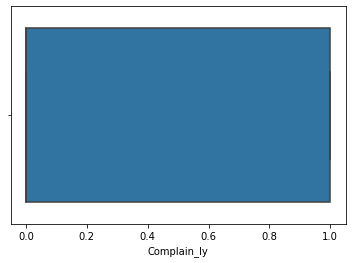

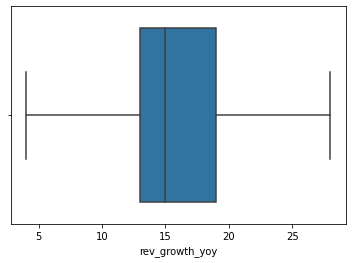

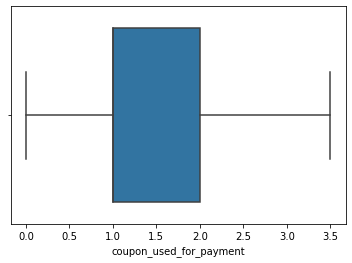

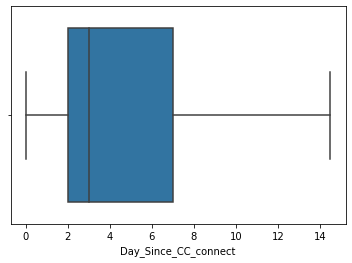

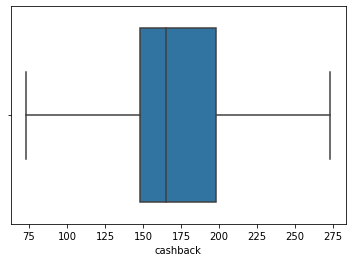

In [158]:
cols = ['Churn','Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score','Account_user_count','CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

### Clustering:

In [159]:
# Geting unique counts of all Objects.

print('Payment\n',df.Payment.value_counts())
print('\n')
print('Gender\n',df.Gender.value_counts())
print('\n')
print('account_segment\n',df.account_segment.value_counts())
print('\n')
print('Marital_Status\n',df.Marital_Status.value_counts())
print('\n')
print('Login_device\n',df.Login_device.value_counts())
print('\n')

Payment
 Debit Card          4572
Credit Card         3428
E wallet            1193
Cash on Delivery     976
UPI                  794
Name: Payment, dtype: int64


Gender
 Male      6631
Female    4332
Name: Gender, dtype: int64


account_segment
 Super           4041
Regular Plus    4001
HNI             1609
Super Plus       801
Regular          511
Name: account_segment, dtype: int64


Marital_Status
 Married     5899
Single      3396
Divorced    1668
Name: Marital_Status, dtype: int64


Login_device
 Mobile      8037
Computer    2926
Name: Login_device, dtype: int64




#### Converting objects to categorical codes:

In [160]:
df['Payment']=np.where(df['Payment'] =='Debit Card', '4', df['Payment'])
df['Payment']=np.where(df['Payment'] =='Credit Card', '3', df['Payment'])
df['Payment']=np.where(df['Payment'] =='E wallet', '2', df['Payment'])
df['Payment']=np.where(df['Payment'] =='Cash on Delivery', '1', df['Payment'])
df['Payment']=np.where(df['Payment'] =='UPI', '0', df['Payment'])

In [161]:
df['Marital_Status']=np.where(df['Marital_Status'] =='Married', '2', df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] =='Single', '1', df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] =='Divorced', '0', df['Marital_Status'])

In [162]:
df['Gender']=np.where(df['Gender'] =='Male', '1', df['Gender'])
df['Gender']=np.where(df['Gender'] =='Female', '0', df['Gender'])

In [163]:
df['Login_device']=np.where(df['Login_device'] =='Mobile', '1', df['Login_device'])
df['Login_device']=np.where(df['Login_device'] =='Computer', '0', df['Login_device'])

In [164]:
df['account_segment']=np.where(df['account_segment'] =='Super', '4', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='Regular Plus', '3', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='HNI', '2', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='Super Plus', '1', df['account_segment'])
df['account_segment']=np.where(df['account_segment'] =='Regular', '0', df['account_segment'])

In [165]:
# converting the'cut','color','clarity' column from object / string type to float.

df['Payment'] = df['Payment'].astype('float64')
df['Marital_Status'] = df['Marital_Status'].astype('float64')
df['Gender'] = df['Gender'].astype('float64')
df['Login_device'] = df['Login_device'].astype('float64')
df['account_segment'] = df['account_segment'].astype('float64')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10963 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    10963 non-null  int64  
 1   Tenure                   10963 non-null  float64
 2   City_Tier                10963 non-null  float64
 3   CC_Contacted_LY          10963 non-null  float64
 4   Payment                  10963 non-null  float64
 5   Gender                   10963 non-null  float64
 6   Service_Score            10963 non-null  float64
 7   Account_user_count       10963 non-null  float64
 8   account_segment          10963 non-null  float64
 9   CC_Agent_Score           10963 non-null  float64
 10  Marital_Status           10963 non-null  float64
 11  rev_per_month            10963 non-null  float64
 12  Complain_ly              10963 non-null  float64
 13  rev_growth_yoy           10963 non-null  float64
 14  coupon_used_for_paymen

In [167]:
df.head(10)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,3.0,6.0,4.0,0.0,3.0,3.0,4.0,2.0,1.0,9.0,1.0,11.0,1.0,5.0,159.93,1.0
1,1,0.0,1.0,8.0,0.0,1.0,3.0,4.0,3.0,3.0,1.0,7.0,1.0,15.0,0.0,0.0,120.90,1.0
2,1,0.0,1.0,30.0,4.0,1.0,2.0,4.0,3.0,3.0,1.0,6.0,1.0,14.0,0.0,3.0,165.25,1.0
3,1,0.0,3.0,15.0,4.0,1.0,2.0,4.0,4.0,5.0,1.0,8.0,0.0,23.0,0.0,3.0,134.07,1.0
4,1,0.0,1.0,12.0,3.0,1.0,2.0,3.0,3.0,5.0,1.0,3.0,0.0,11.0,1.0,3.0,129.60,1.0
5,1,0.0,1.0,22.0,4.0,0.0,3.0,4.0,3.0,5.0,1.0,2.0,1.0,22.0,3.5,7.0,139.19,0.0
6,1,2.0,3.0,11.0,1.0,1.0,2.0,3.0,4.0,2.0,0.0,4.0,0.0,14.0,0.0,0.0,120.86,1.0
7,1,0.0,1.0,6.0,3.0,1.0,3.0,3.0,3.0,2.0,0.0,3.0,1.0,16.0,2.0,0.0,122.93,1.0
8,1,13.0,3.0,9.0,2.0,1.0,2.0,4.0,3.0,3.0,0.0,2.0,1.0,14.0,0.0,2.0,126.83,1.0
9,1,0.0,1.0,31.0,4.0,1.0,2.0,5.0,3.0,3.0,1.0,2.0,0.0,12.0,1.0,1.0,122.93,1.0


In [168]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = X.fit_transform(df)
scaled_df

array([[ 2.22451199, -0.54696474,  1.48008446, ...,  0.12591331,
        -0.40414639,  0.60337898],
       [ 2.22451199, -0.85798808, -0.70923834, ..., -1.30543016,
        -1.29214194,  0.60337898],
       [ 2.22451199, -0.85798808, -0.70923834, ..., -0.44662408,
        -0.2831078 ,  0.60337898],
       ...,
       [-0.4495368 , -0.78023224, -0.70923834, ..., -0.16035538,
         0.31230198,  0.60337898],
       [-0.4495368 ,  0.93039611,  1.48008446, ...,  1.27098809,
         0.05020337, -1.65733317],
       [-0.4495368 , -0.2359414 , -0.70923834, ..., -0.44662408,
        -0.06036948,  0.60337898]])

### Dataset Split: